<a href="https://colab.research.google.com/github/AnkanaSonowal/Opinion-Based-Community-Detection-in-Online-Social-Networks/blob/main/ClusteringGMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.cluster import DBSCAN 
import math
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('finalValuesUpdated.csv')  
my_data = pd.read_csv('finalValuesUpdated.csv',index_col=0)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
my_data.head(10)

,user_id,initial_opinion,following,convincing_power,bias,convincing_power_changed
0,3610511,0.192474,"[199, 109, 94, 463, 396, 138, 172, 60, 358, 21...",0.335032,0.928372,0.747510
1,5656162,0.043894,"[175, 61, 291, 250, 238, 355, 164, 2, 86, 413,...",0.021310,0.071074,0.239313
2,5682702,-0.013099,"[117, 150, 19, 330, 165, 130, 100]",0.083010,0.138611,0.130166
3,6015122,0.321966,"[327, 99, 142, 141, 333, 76, 456, 251, 90, 233...",0.007278,0.345125,0.176563
4,6067292,-0.022954,"[131, 300, 83, 443, 199, 363, 346, 366, 14, 20...",0.363498,0.256579,0.838597
5,6134312,0.367970,"[285, 182, 257, 297, 432, 151, 457, 343, 448, ...",0.033457,0.505754,0.064320
6,6140012,0.032493,"[187, 142, 189, 135, 38]",0.315570,0.126480,0.815821
7,6684602,0.318297,"[384, 13, 344, 113, 285, 266]",0.042586,0.342607,0.225524
8,7046912,0.216096,"[236, 140, 256, 413, 335, 202, 102, 375, 121, ...",0.349463,0.284009,0.990509
9,8072492,0.194265,"[280, 382, 295, 52, 307, 374, 314, 431, 139, 3...",0.014370,0.048864,0.215302


In [ ]:
bs=my_data['bias']
v=my_data['convincing_power_changed']

In [ ]:
w1=[]
for i in range(len(my_data)):
  w1.append(my_data['initial_opinion'][i])

#CHECK IF NEGATIVE VALUES FOLLOW NORMAL DISTRIBUTION

In [ ]:
neg=[]
id=[]
for i in range(len(w1)):
  if(w1[i]<=0):
    neg.append(w1[i])
    id.append(i)


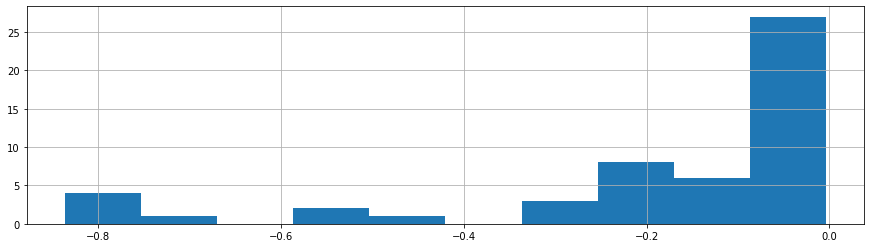

In [ ]:
plt.figure(figsize=(15,4))
plt.hist(neg)
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 1080x288 with 0 Axes>

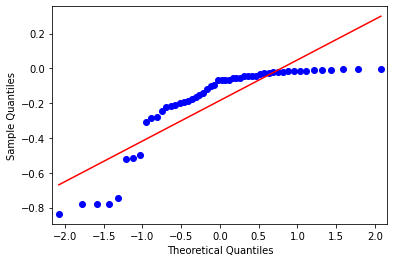

In [ ]:
plt.figure(figsize=(15,4))
negarr=np.array(neg)
qqplot(negarr,line='s')
plt.show()

#CHECK IF POSITIVE VALUES FOLLOW NORMAL DISTRIBUTION

In [ ]:
pos=[]
for i in range(len(w1)):
  if(w1[i]>0):
    pos.append(w1[i])
 


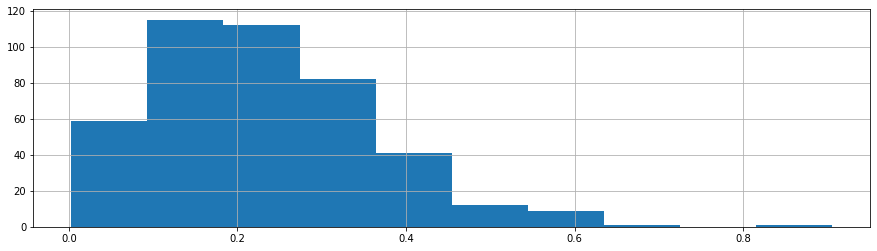

In [ ]:
plt.figure(figsize=(15,4))
plt.hist(pos)
plt.grid(True)
plt.show()

#nearer to diagonal the closer to expected diagonal pattern for a sample from a Gaussian distribution

<Figure size 1080x288 with 0 Axes>

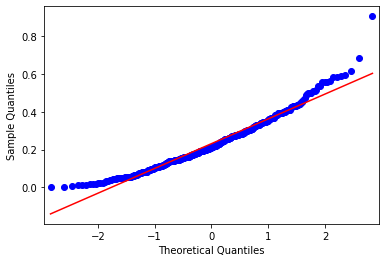

In [ ]:
plt.figure(figsize=(15,4))
posarr=np.array(pos)
qqplot(posarr,line='s')
plt.show()

#CHECK IF DATASET FOLLOW NORMAL DISTRIBUTION

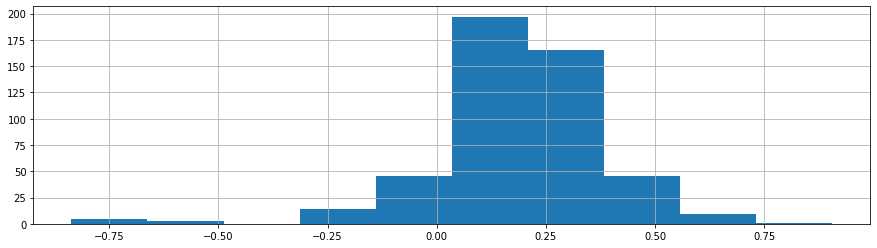

In [ ]:
plt.figure(figsize=(15,4))
plt.hist(w1)
plt.grid(True)
plt.show()

<Figure size 1080x288 with 0 Axes>

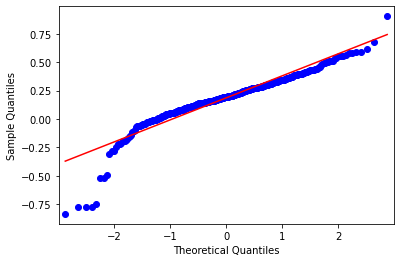

In [ ]:
plt.figure(figsize=(15,4))
w1arr=np.array(w1)
qqplot(w1arr,line='s')
plt.show()

#CONCLUSION IS THE DATASET FOLLOW NORMAL DISTRIBUTION ,BASICALLY THE POSITIVE VALUES

#ANOTHER STATISTICAL METHOD TO CHECK GAUSSIAN DISTRIBUTION

#The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution

In [ ]:

# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
w1arr=np.array(w1)
stat, p = shapiro(w1arr)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


Statistics=0.899, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
opinion=w1[:]
bias=bs[:]
convin=v[:]

In [ ]:
print(opinion) #must be same as w1[] check

[0.192473822, 0.043894036, -0.013099236, 0.321965538, -0.022953515, 0.36797032, 0.03249269, 0.31829728399999996, 0.21609568399999998, 0.19426516100000002, 0.33768462200000005, 0.025069112999999997, 0.472983957, 0.134556984, 0.276018991, 0.141037791, 0.206367711, 0.271908394, 0.48705149600000003, 0.308199245, 0.136033504, 0.094091044, -0.28515718, -0.045097411, -0.0038569359999999996, 0.062066592999999996, 0.25622608, 0.160526327, -0.06604927599999999, -0.8365, 0.142333238, 0.227136735, 0.079523024, 0.07978104, 0.194576, 0.098898901, 0.147287644, -0.06468774599999999, 0.051753923, 0.115078094, 0.115078094, 0.112742636, 0.25810604800000003, 0.227528605, -0.015328372, 0.228495027, 0.217712475, 0.048540384000000006, 0.278606712, 0.05338163, 0.281246079, 0.253457696, 0.38175578600000004, 0.24559457699999998, 0.083227722, 0.32965760899999996, 0.08901656599999999, 0.056611863, 0.189087662, 0.55801628, -0.041121436000000004, 0.275051609, 0.365664228, 0.269104092, 0.242005215, 0.275159283000000

In [ ]:
idarr=[]
for i in range (0,484):
  idarr.append(i+1)

iteration  0
scale of w2:  [ -0.7887266554219914 , 0.771704137787773 ]


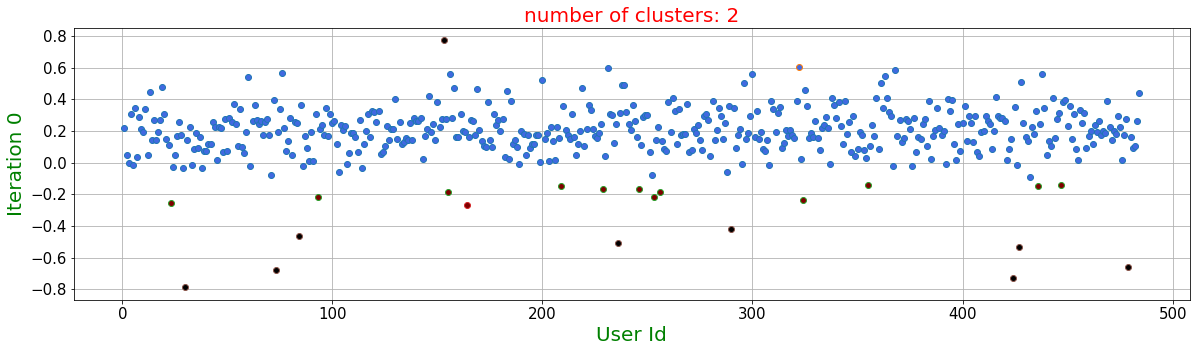

Silhouette Co-efficient:  0.592
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 62.1900826446281 %
----------------------------------------------------------
484
iteration  1
scale of w2:  [ -0.7432438913386514 , 0.6626263976533107 ]


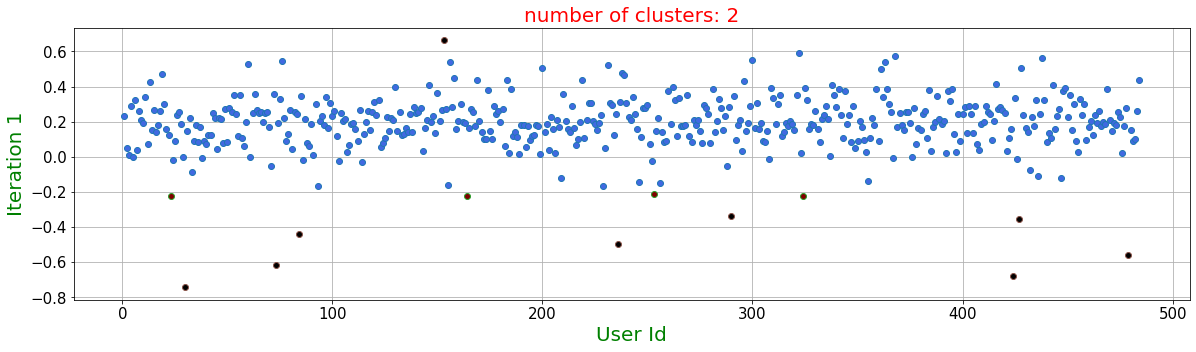

Silhouette Co-efficient:  0.614
No of users changing color :  9
Percentage of users changing color :  1.859504132231405
----------------------------------------------------------


percentage difference: 60.537190082644635 %
----------------------------------------------------------
484
iteration  2
scale of w2:  [ -0.6999250205035682 , 0.576654280061109 ]


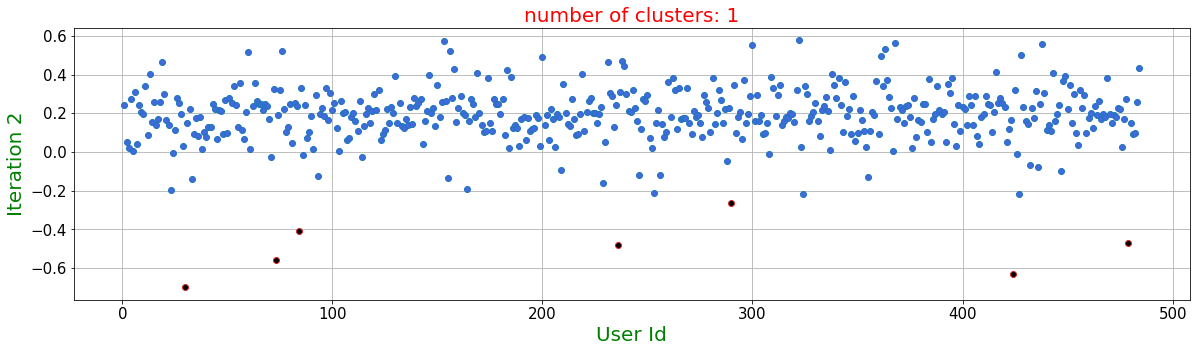

Silhouette Co-efficient:  0.786
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------


percentage difference: 54.958677685950406 %
----------------------------------------------------------
484
iteration  3
scale of w2:  [ -0.6586524110815831 , 0.5645298150498017 ]


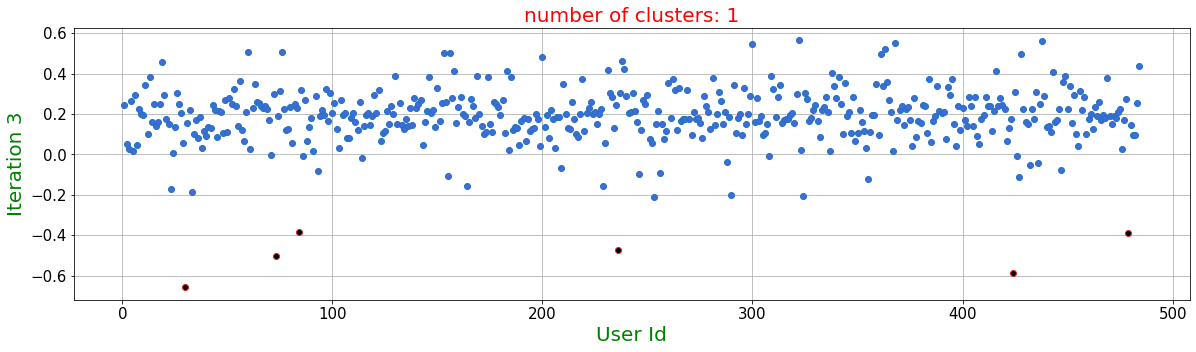

Silhouette Co-efficient:  0.797
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 51.2396694214876 %
----------------------------------------------------------
484
iteration  4
scale of w2:  [ -0.6193167138926398 , 0.5586720032362881 ]


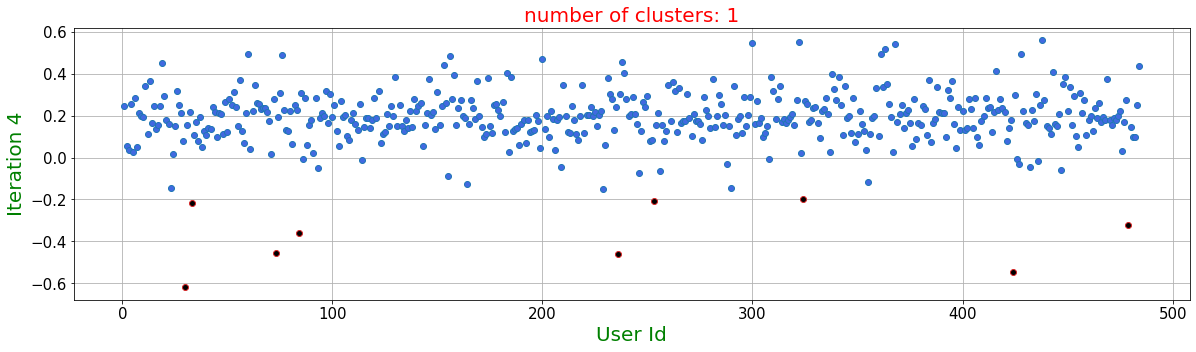

Silhouette Co-efficient:  0.773
No of users changing color :  3
Percentage of users changing color :  0.6198347107438017
----------------------------------------------------------


percentage difference: 52.892561983471076 %
----------------------------------------------------------
484
iteration  5
scale of w2:  [ -0.5818161123234713 , 0.558045198104204 ]


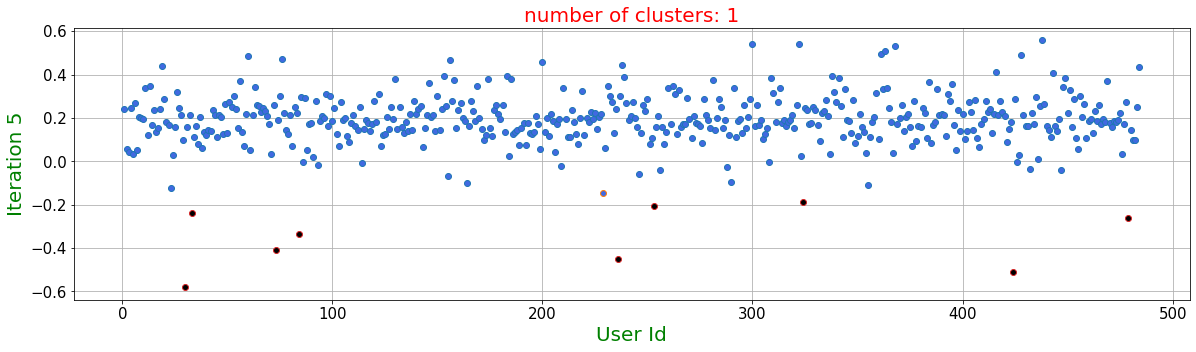

Silhouette Co-efficient:  0.777
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 48.553719008264466 %
----------------------------------------------------------
484
iteration  6
scale of w2:  [ -0.5460556335409954 , 0.5574281658465855 ]


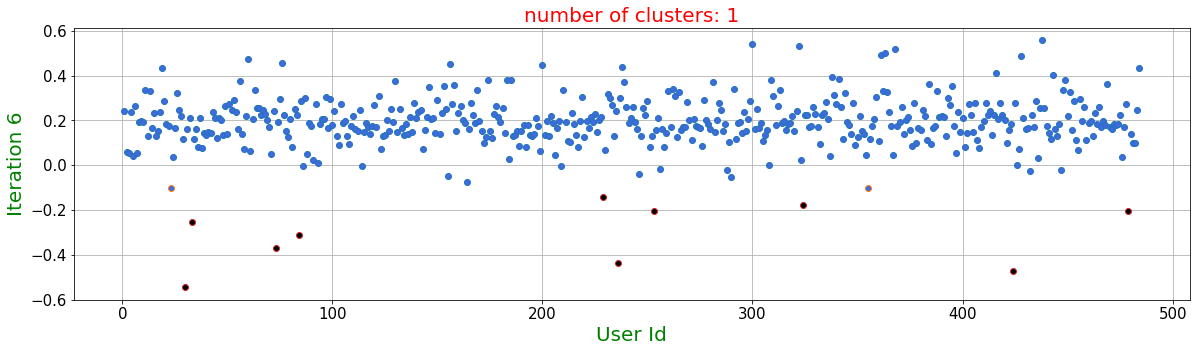

Silhouette Co-efficient:  0.774
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 42.768595041322314 %
----------------------------------------------------------
484
iteration  7
scale of w2:  [ -0.5119465300605867 , 0.556819900166078 ]


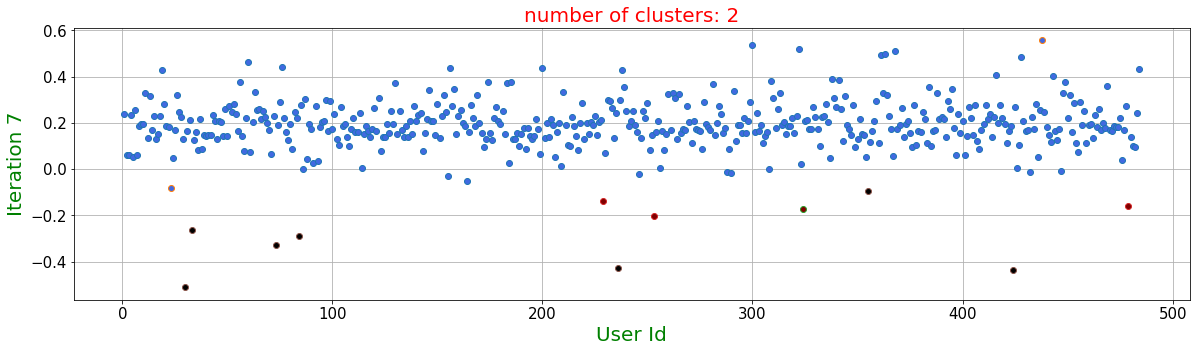

Silhouette Co-efficient:  0.687
No of users changing color :  5
Percentage of users changing color :  1.0330578512396695
----------------------------------------------------------


percentage difference: 42.14876033057851 %
----------------------------------------------------------
484
iteration  8
scale of w2:  [ -0.47940572910062546 , 0.5562195029534178 ]


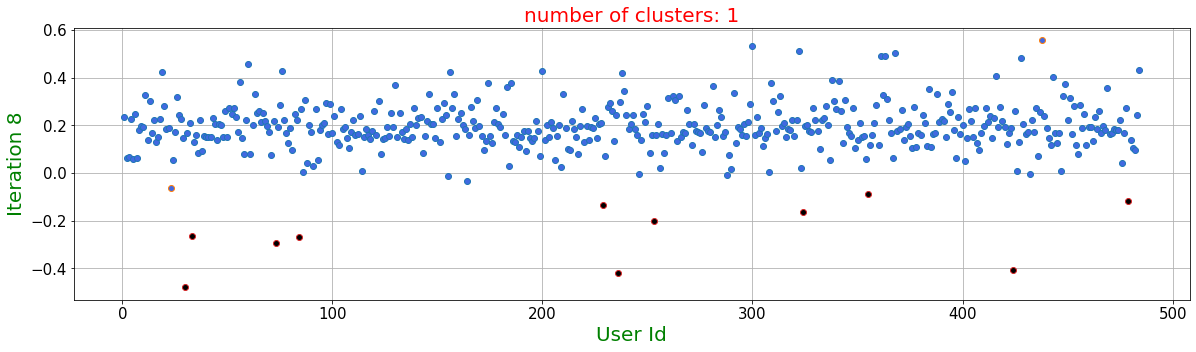

Silhouette Co-efficient:  0.772
No of users changing color :  4
Percentage of users changing color :  0.8264462809917356
----------------------------------------------------------


percentage difference: 37.1900826446281 %
----------------------------------------------------------
484
iteration  9
scale of w2:  [ -0.44835534321796944 , 0.555626170670206 ]


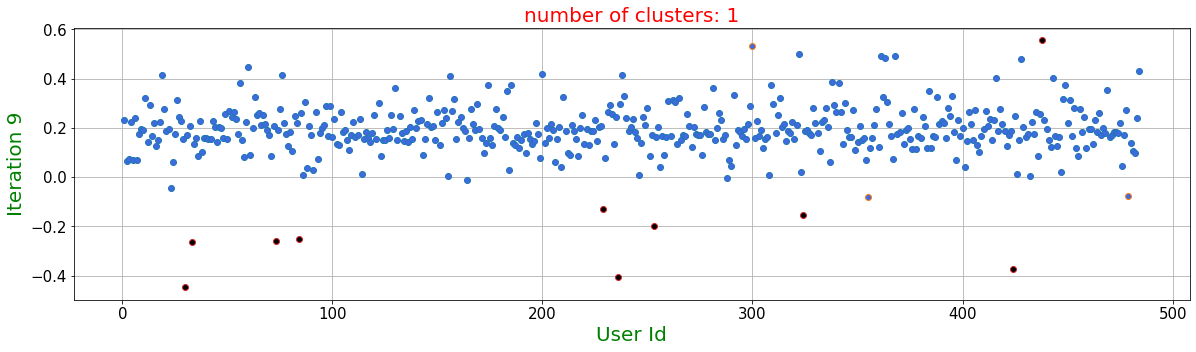

Silhouette Co-efficient:  0.781
No of users changing color :  3
Percentage of users changing color :  0.6198347107438017
----------------------------------------------------------


percentage difference: 34.710743801652896 %
----------------------------------------------------------
484
iteration  10
scale of w2:  [ -0.41872223494240896 , 0.5550391827113642 ]


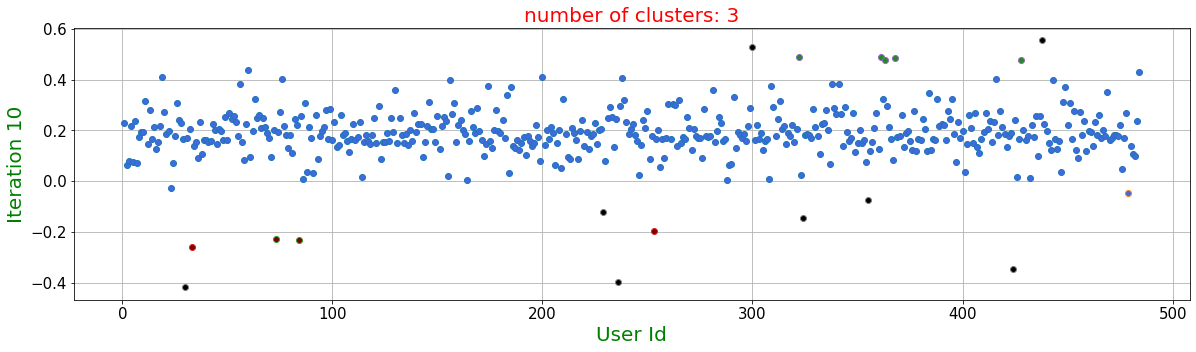

Silhouette Co-efficient:  0.627
No of users changing color :  11
Percentage of users changing color :  2.272727272727273
----------------------------------------------------------


percentage difference: 32.438016528925615 %
----------------------------------------------------------
484
iteration  11
scale of w2:  [ -0.39043762855023306 , 0.5544578914543916 ]


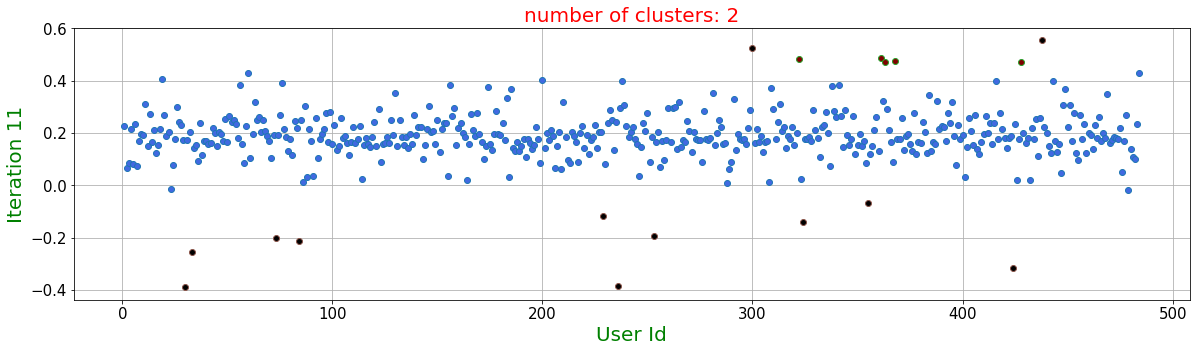

Silhouette Co-efficient:  0.651
No of users changing color :  9
Percentage of users changing color :  1.859504132231405
----------------------------------------------------------


percentage difference: 29.75206611570248 %
----------------------------------------------------------
484
iteration  12
scale of w2:  [ -0.37699379382470144 , 0.5538817137379858 ]


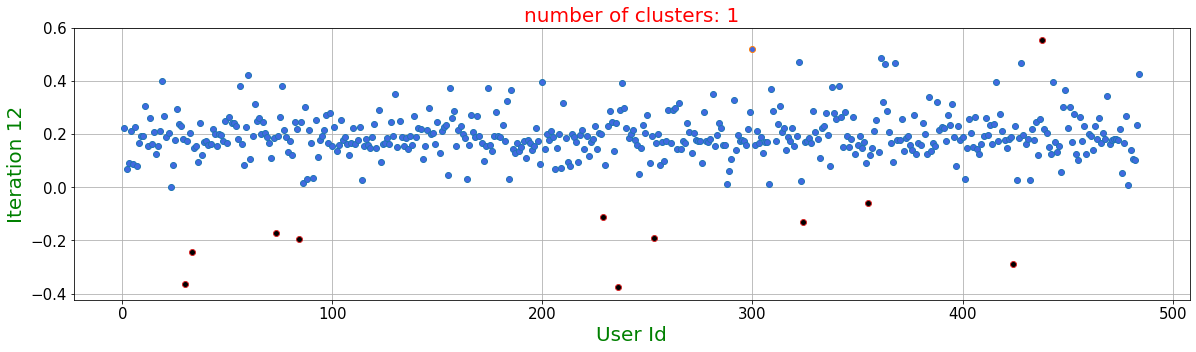

Silhouette Co-efficient:  0.781
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------


percentage difference: 27.685950413223143 %
----------------------------------------------------------
484
iteration  13
scale of w2:  [ -0.36733295859926707 , 0.5533101235479936 ]


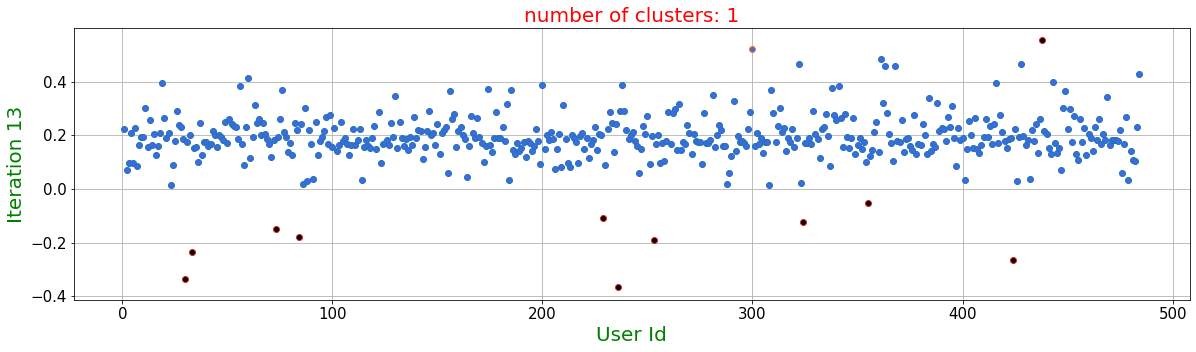

Silhouette Co-efficient:  0.782
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 25.206611570247933 %
----------------------------------------------------------
484
iteration  14
scale of w2:  [ -0.3578220866321449 , 0.5527426457214188 ]


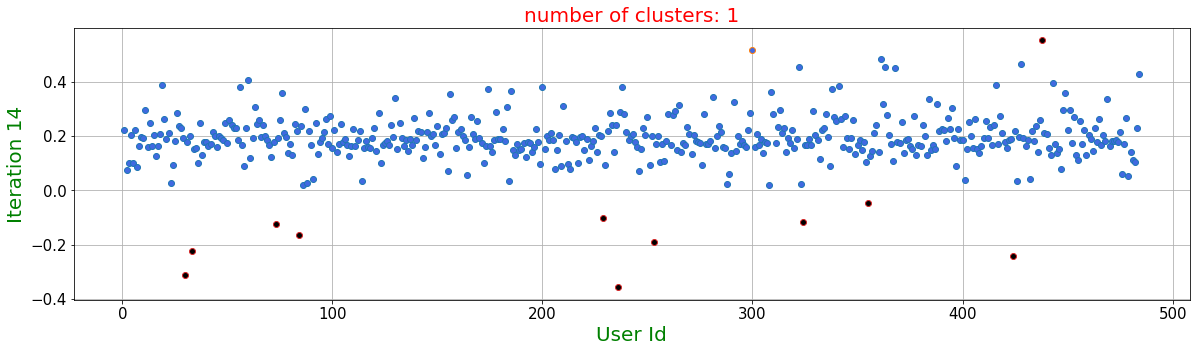

Silhouette Co-efficient:  0.783
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 23.553719008264462 %
----------------------------------------------------------
484
iteration  15
scale of w2:  [ -0.34845904276302586 , 0.5521788505083588 ]


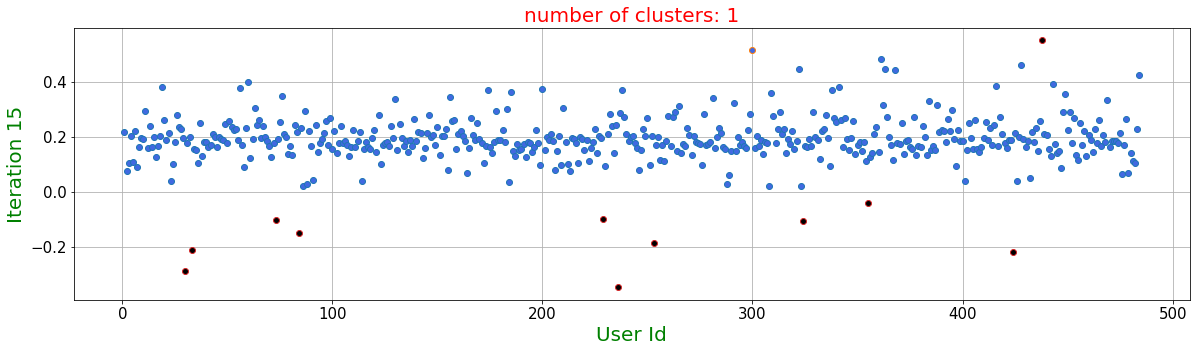

Silhouette Co-efficient:  0.784
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 25.413223140495866 %
----------------------------------------------------------
484
iteration  16
scale of w2:  [ -0.3392417719848225 , 0.5516183488570929 ]


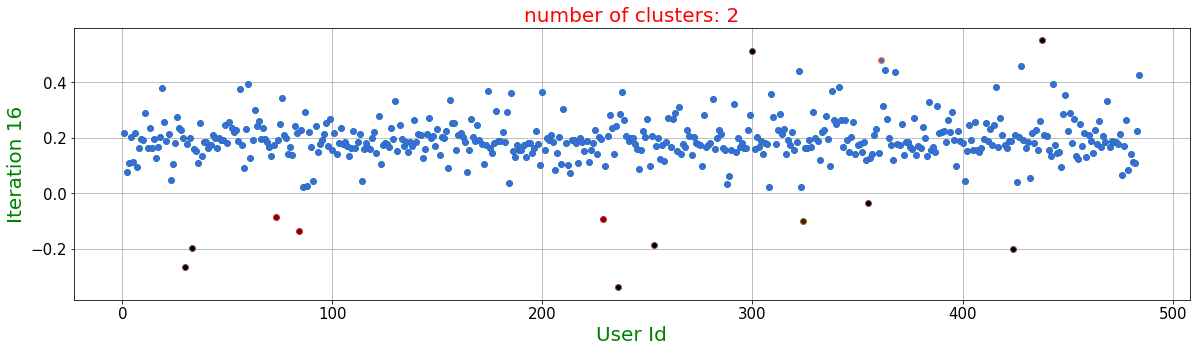

Silhouette Co-efficient:  0.722
No of users changing color :  5
Percentage of users changing color :  1.0330578512396695
----------------------------------------------------------


percentage difference: 18.181818181818183 %
----------------------------------------------------------
484
iteration  17
scale of w2:  [ -0.3301682820109932 , 0.5510607883093005 ]


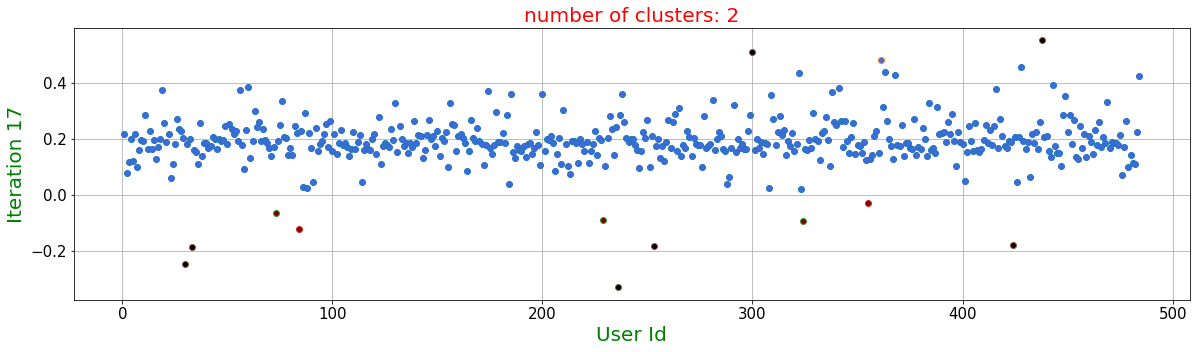

Silhouette Co-efficient:  0.711
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 22.31404958677686 %
----------------------------------------------------------
484
iteration  18
scale of w2:  [ -0.32123663120002277 , 0.5505058494108631 ]


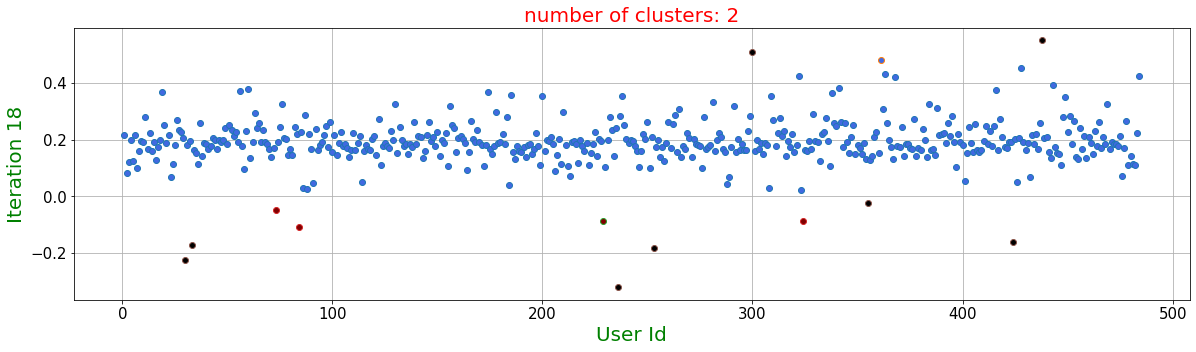

Silhouette Co-efficient:  0.719
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 19.421487603305785 %
----------------------------------------------------------
484
iteration  19
scale of w2:  [ -0.31244492013430986 , 0.5499532425593099 ]


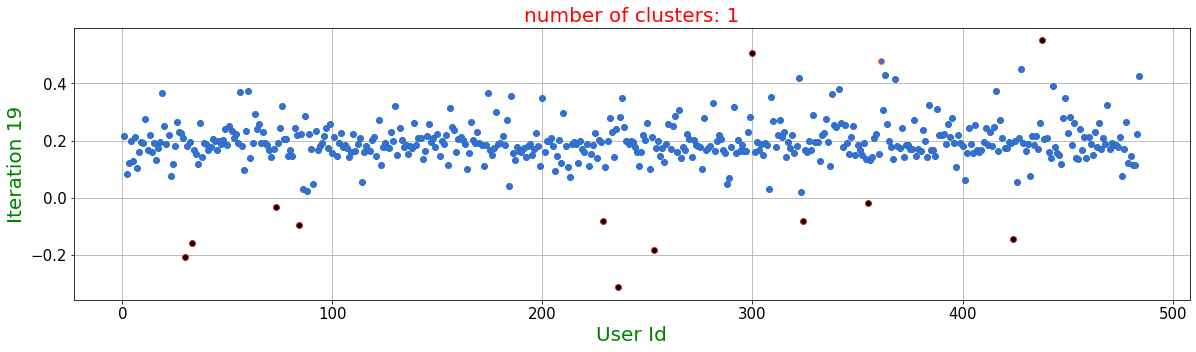

Silhouette Co-efficient:  0.781
No of users changing color :  4
Percentage of users changing color :  0.8264462809917356
----------------------------------------------------------


percentage difference: 16.735537190082646 %
----------------------------------------------------------
484
iteration  20
scale of w2:  [ -0.30379128566127606 , 0.549402705222063 ]


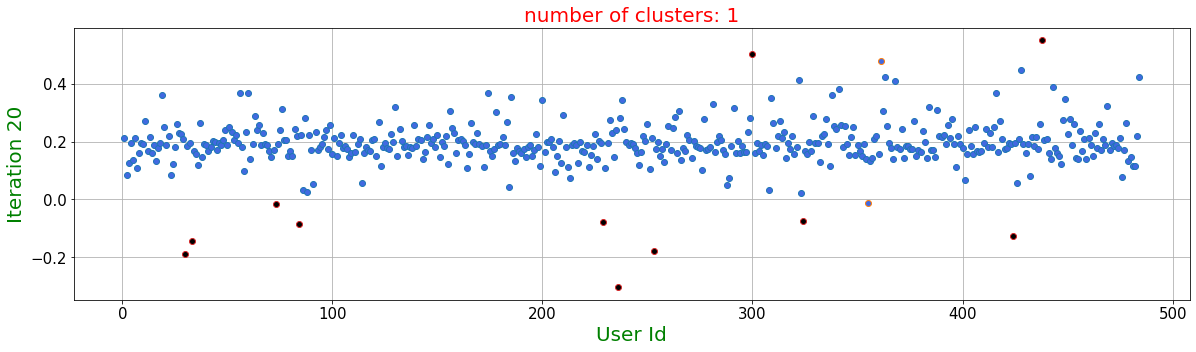

Silhouette Co-efficient:  0.786
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 16.528925619834713 %
----------------------------------------------------------
484
iteration  21
scale of w2:  [ -0.2952738965720316 , 0.5488539994706021 ]


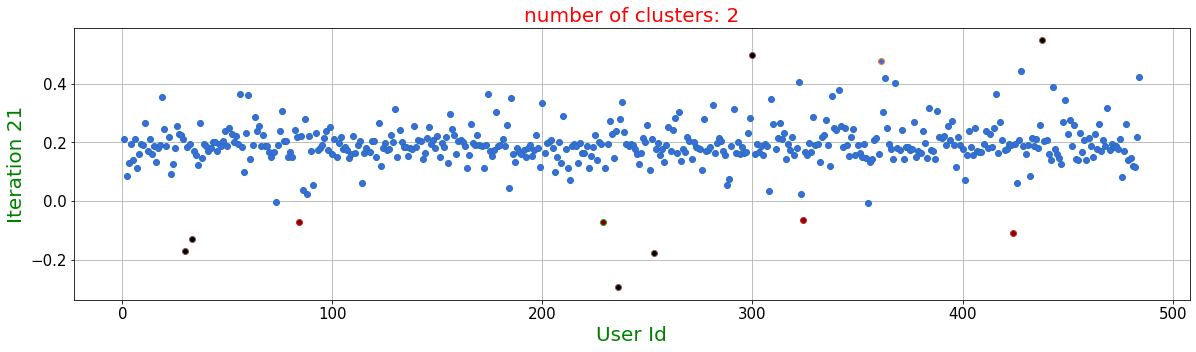

Silhouette Co-efficient:  0.737
No of users changing color :  5
Percentage of users changing color :  1.0330578512396695
----------------------------------------------------------


percentage difference: 14.049586776859504 %
----------------------------------------------------------
484
iteration  22
scale of w2:  [ -0.28689095035559004 , 0.5483069097848021 ]


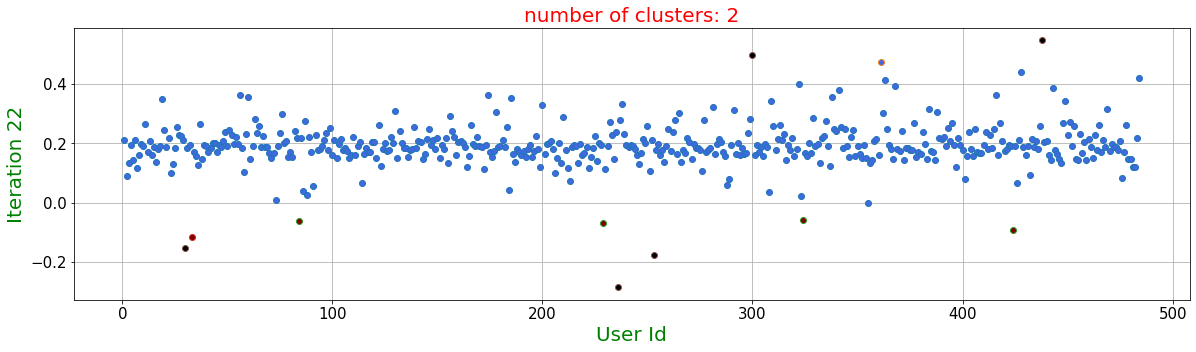

Silhouette Co-efficient:  0.746
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 16.94214876033058 %
----------------------------------------------------------
484
iteration  23
scale of w2:  [ -0.2786406706526764 , 0.5477612410893001 ]


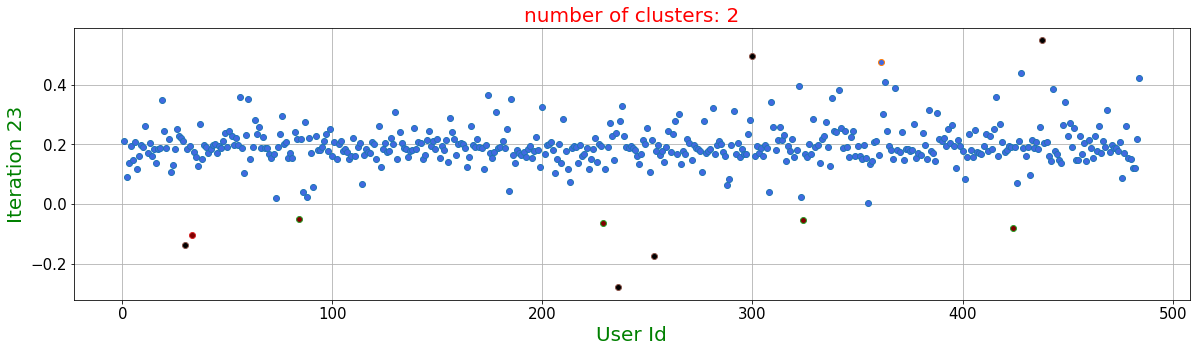

Silhouette Co-efficient:  0.744
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 15.495867768595042 %
----------------------------------------------------------
484
iteration  24
scale of w2:  [ -0.2705213051635006 , 0.5472168169900498 ]


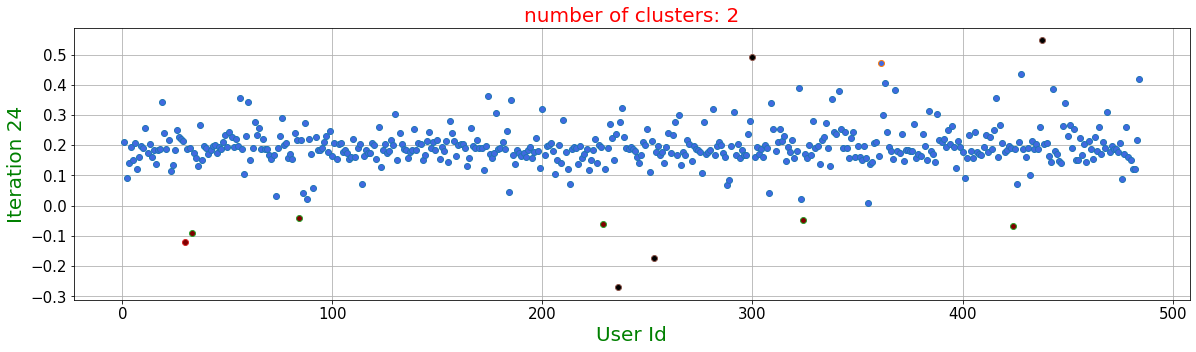

Silhouette Co-efficient:  0.753
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 14.669421487603307 %
----------------------------------------------------------
484
iteration  25
scale of w2:  [ -0.26253112385388416 , 0.546673478184449 ]


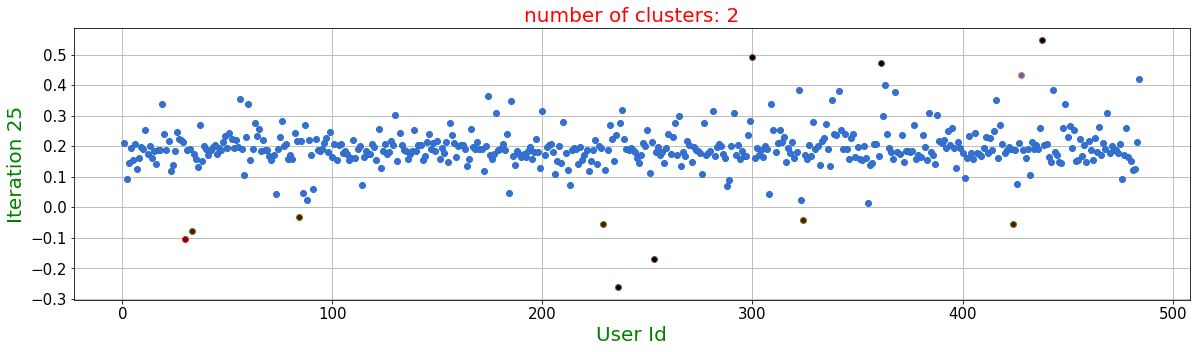

Silhouette Co-efficient:  0.748
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 9.710743801652892 %
----------------------------------------------------------
484
iteration  26
scale of w2:  [ -0.2546684173651888 , 0.5461310810227449 ]


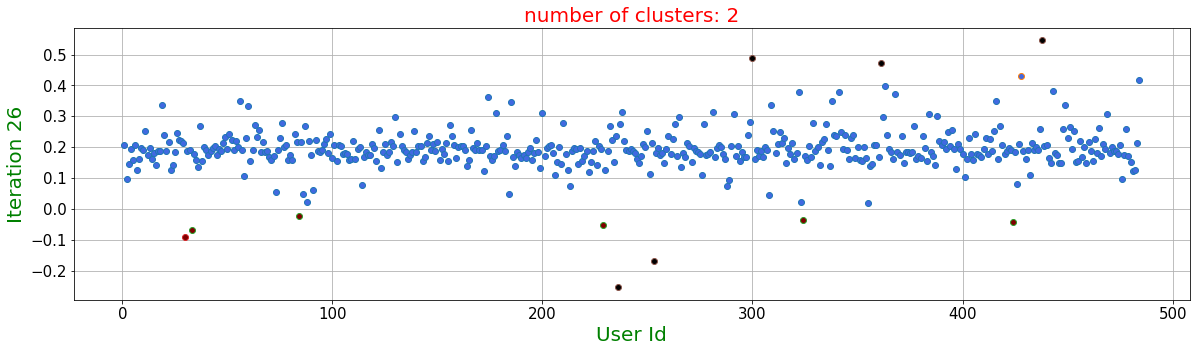

Silhouette Co-efficient:  0.746
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 14.46280991735537 %
----------------------------------------------------------
484
iteration  27
scale of w2:  [ -0.2469314955739366 , 0.54558949620199 ]


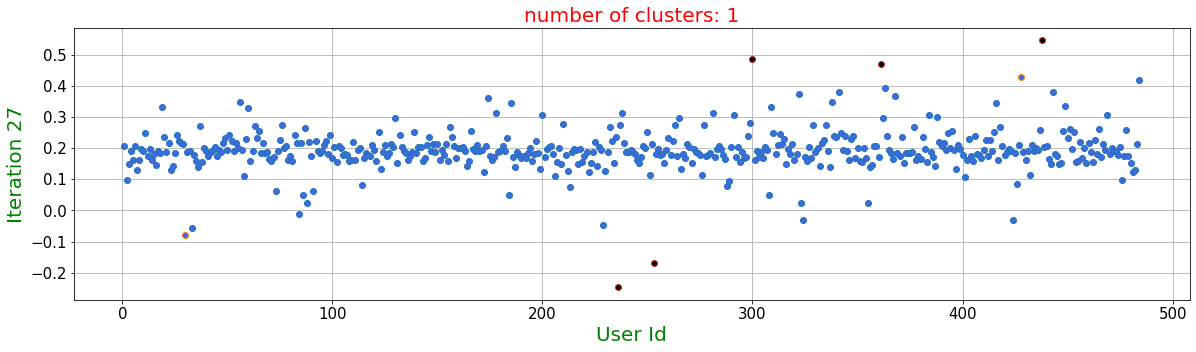

Silhouette Co-efficient:  0.817
No of users changing color :  6
Percentage of users changing color :  1.2396694214876034
----------------------------------------------------------


percentage difference: 10.330578512396695 %
----------------------------------------------------------
484
iteration  28
scale of w2:  [ -0.23931868627293526 , 0.5450486075767745 ]


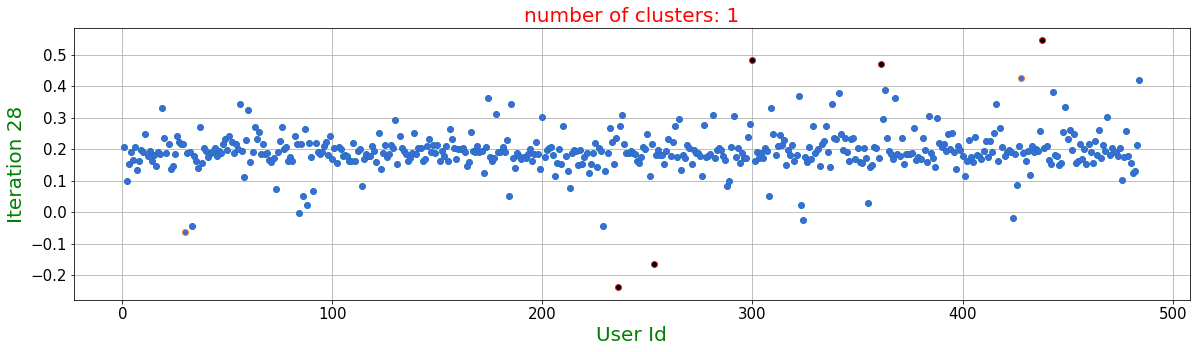

Silhouette Co-efficient:  0.82
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 14.049586776859504 %
----------------------------------------------------------
484
iteration  29
scale of w2:  [ -0.23182833396156563 , 0.5445083110733895 ]


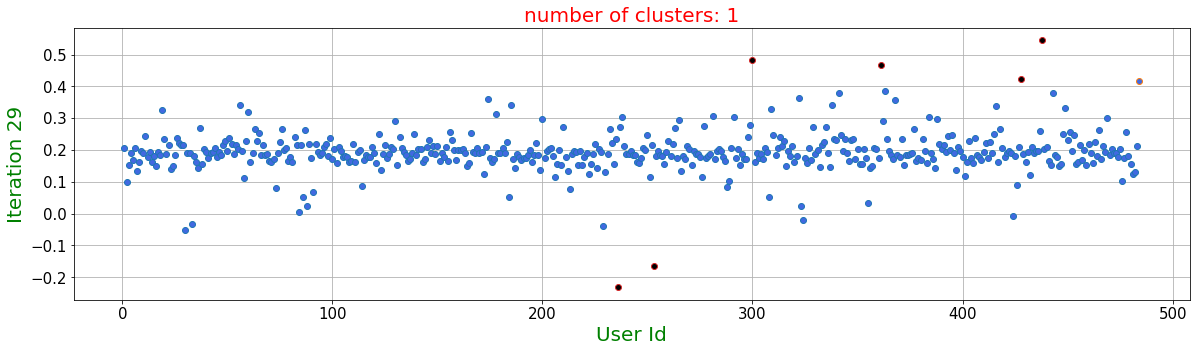

Silhouette Co-efficient:  0.814
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 10.950413223140496 %
----------------------------------------------------------
484
iteration  30
scale of w2:  [ -0.22445879874186694 , 0.5439685136960888 ]


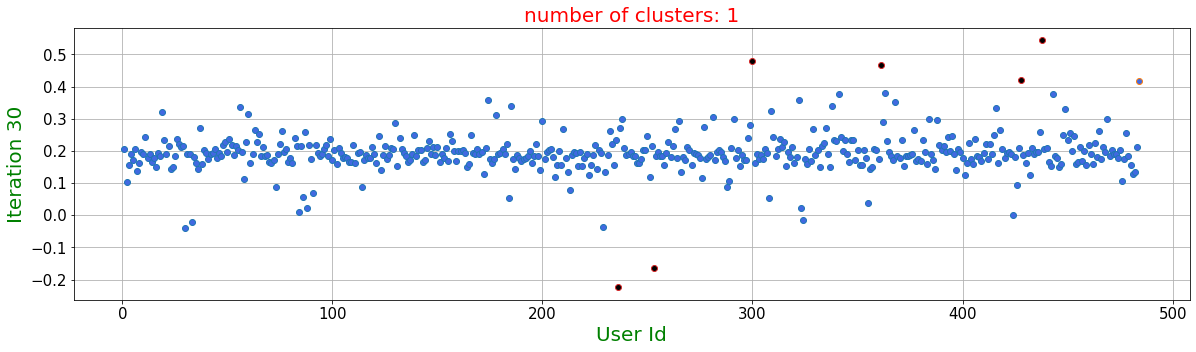

Silhouette Co-efficient:  0.817
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 12.190082644628099 %
----------------------------------------------------------
484
iteration  31
scale of w2:  [ -0.21720845532147148 , 0.5434291326157746 ]


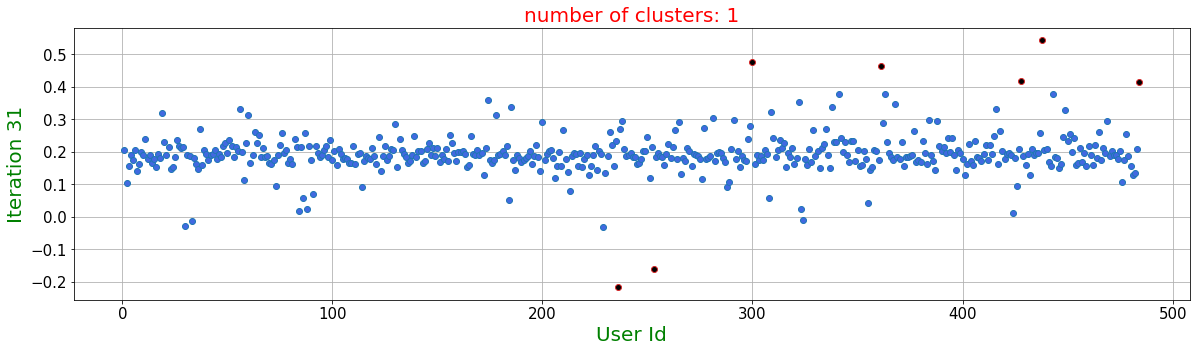

Silhouette Co-efficient:  0.813
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 11.15702479338843 %
----------------------------------------------------------
484
iteration  32
scale of w2:  [ -0.21007569212592966 , 0.5428900943328054 ]


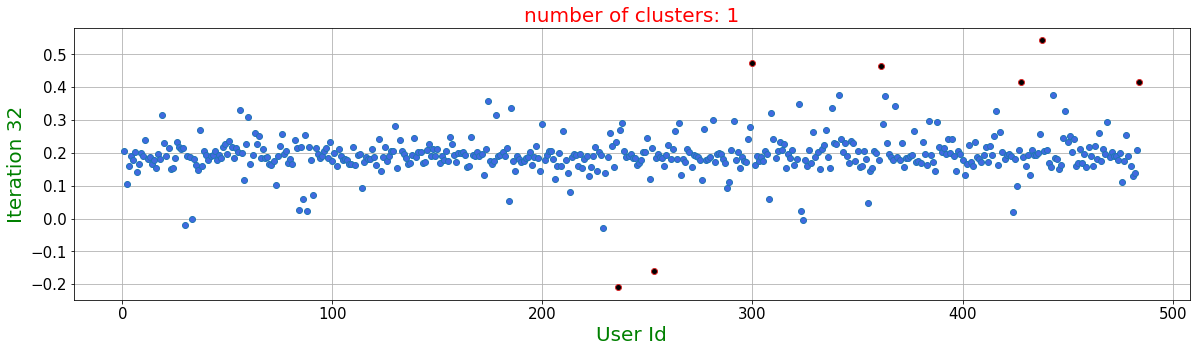

Silhouette Co-efficient:  0.816
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 9.50413223140496 %
----------------------------------------------------------
484
iteration  33
scale of w2:  [ -0.2030589105226791 , 0.5423513339067608 ]


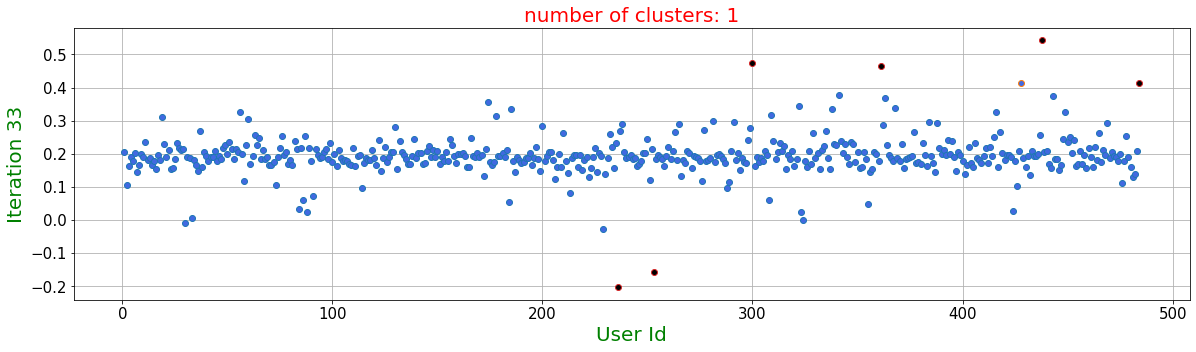

Silhouette Co-efficient:  0.825
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 11.983471074380166 %
----------------------------------------------------------
484
iteration  34
scale of w2:  [ -0.19615652415763477 , 0.5418127942469432 ]


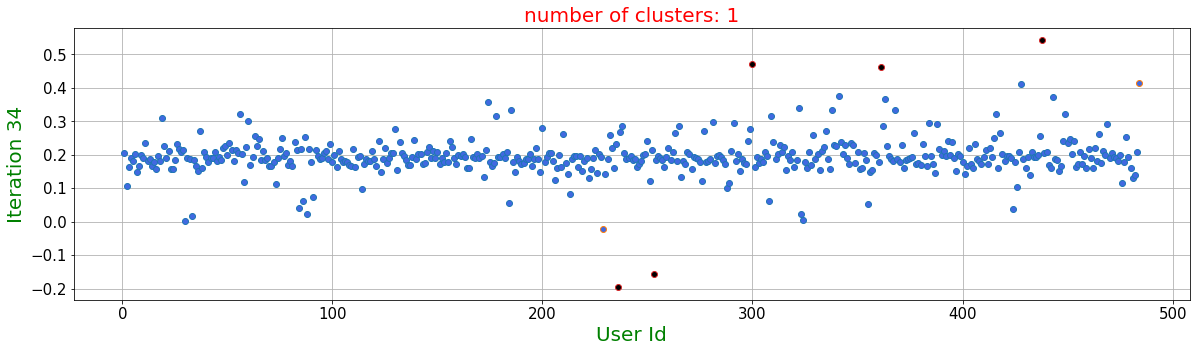

Silhouette Co-efficient:  0.836
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 8.677685950413224 %
----------------------------------------------------------
484
iteration  35
scale of w2:  [ -0.18936695840364592 , 0.5412744254581792 ]


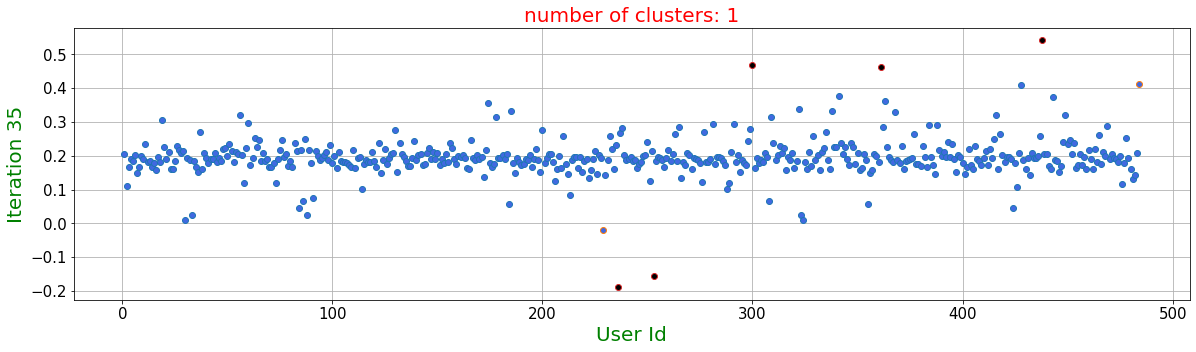

Silhouette Co-efficient:  0.838
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 6.40495867768595 %
----------------------------------------------------------
484
iteration  36
scale of w2:  [ -0.18268864991822528 , 0.5407361842371412 ]


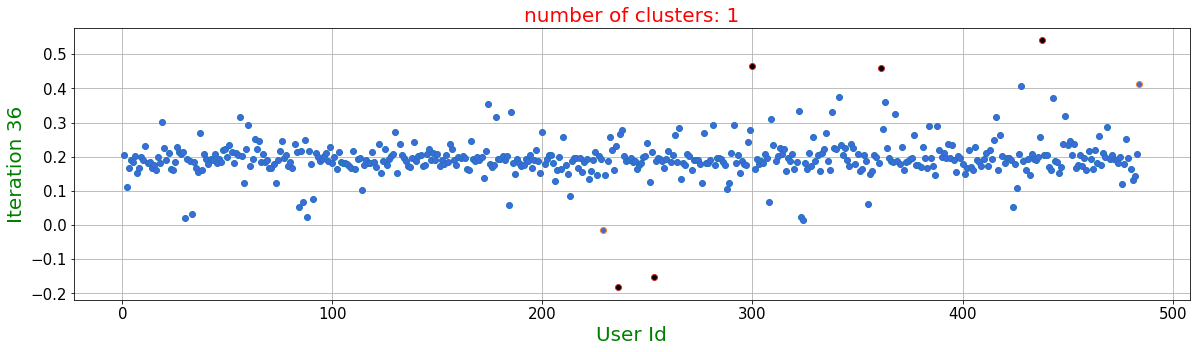

Silhouette Co-efficient:  0.84
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 9.710743801652892 %
----------------------------------------------------------
484
iteration  37
scale of w2:  [ -0.17612004630622205 , 0.5401980333149599 ]


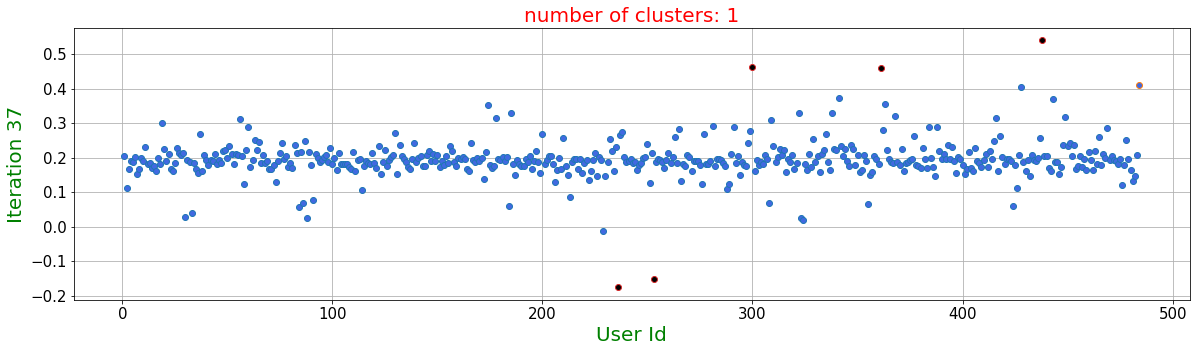

Silhouette Co-efficient:  0.842
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 9.50413223140496 %
----------------------------------------------------------
484
iteration  38
scale of w2:  [ -0.16965960588160767 , 0.5396599409423607 ]


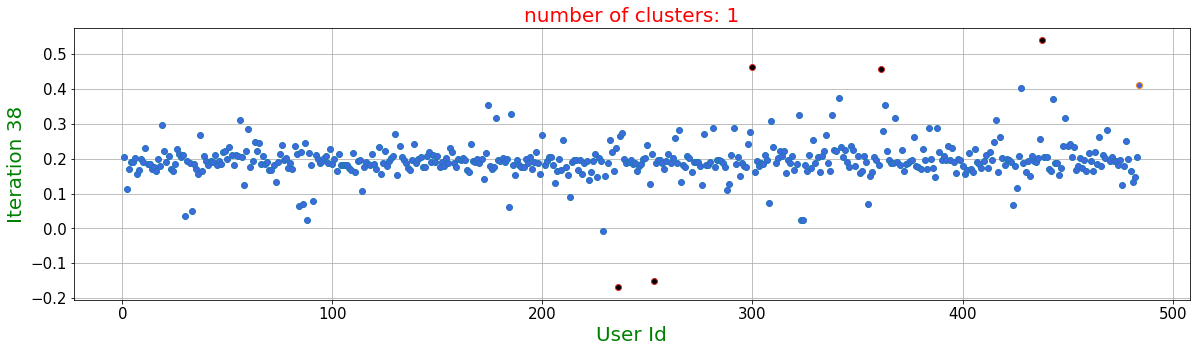

Silhouette Co-efficient:  0.844
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 6.8181818181818175 %
----------------------------------------------------------
484
iteration  39
scale of w2:  [ -0.16330579752133068 , 0.539121880413952 ]


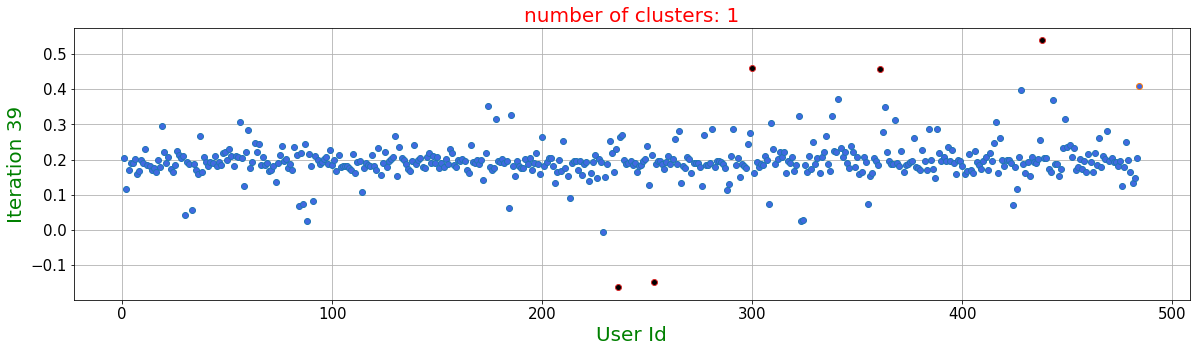

Silhouette Co-efficient:  0.846
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 7.231404958677685 %
----------------------------------------------------------
484
iteration  40
scale of w2:  [ -0.15705710060329411 , 0.5385838296286272 ]


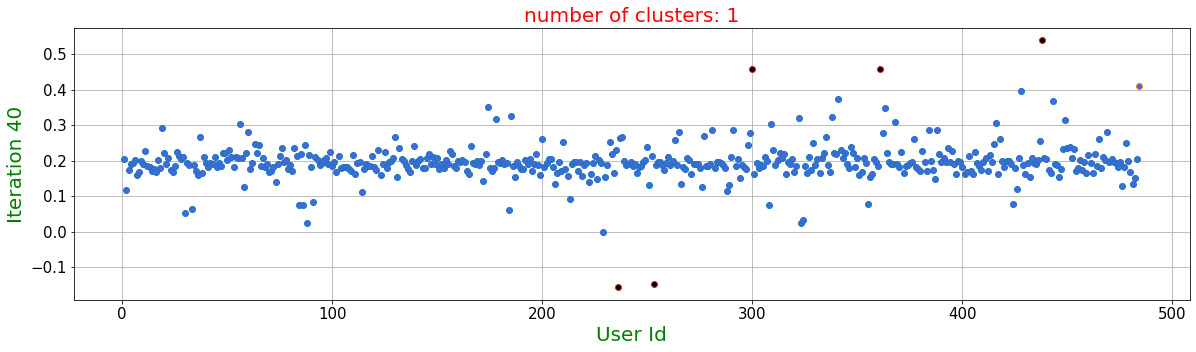

Silhouette Co-efficient:  0.848
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 6.40495867768595 %
----------------------------------------------------------
484
iteration  41
scale of w2:  [ -0.15091200501990631 , 0.5380457706833286 ]


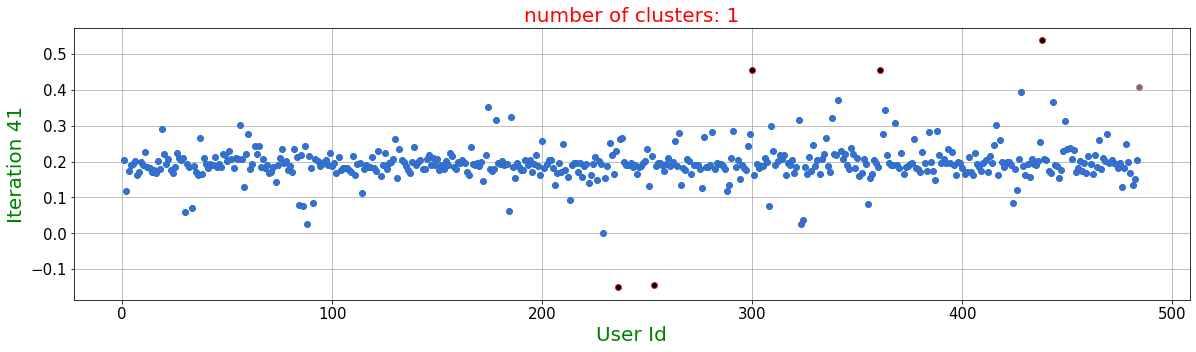

Silhouette Co-efficient:  0.85
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 7.644628099173553 %
----------------------------------------------------------
484
iteration  42
scale of w2:  [ -0.14486901125832968 , 0.537507689497675 ]


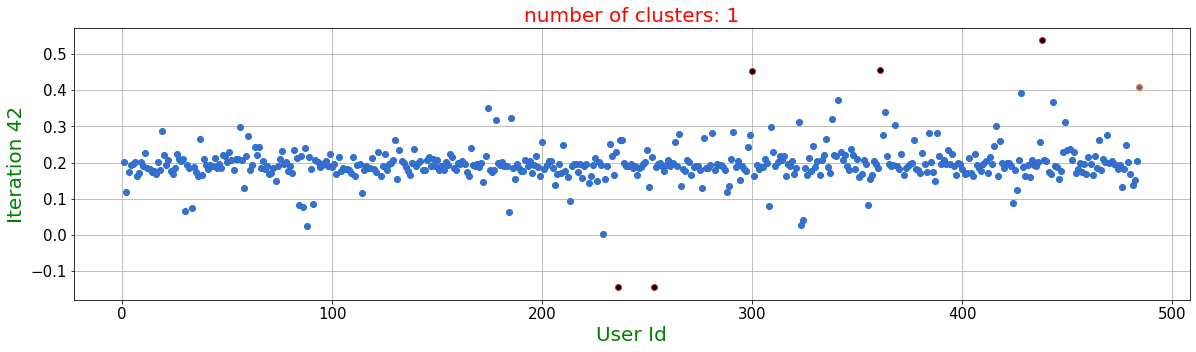

Silhouette Co-efficient:  0.852
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 8.057851239669422 %
----------------------------------------------------------
484
iteration  43
scale of w2:  [ -0.14237274738107772 , 0.536969575467164 ]


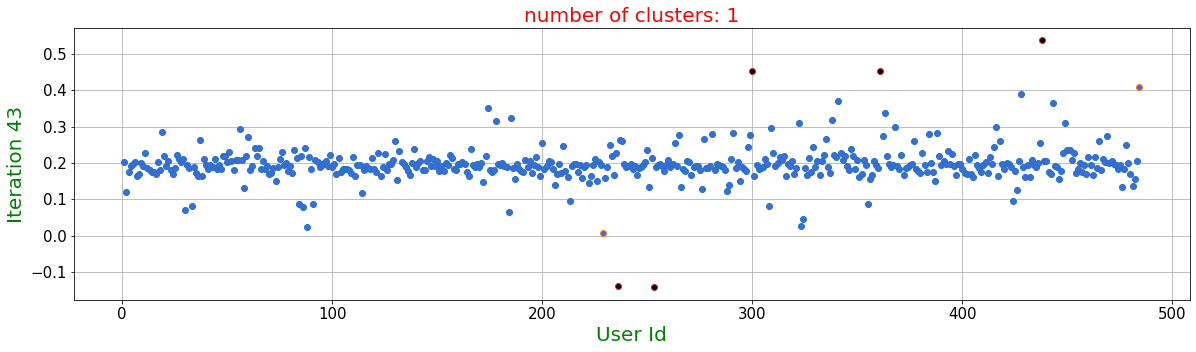

Silhouette Co-efficient:  0.853
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.545454545454546 %
----------------------------------------------------------
484
iteration  44
scale of w2:  [ -0.14084728269144312 , 0.5364314211428565 ]


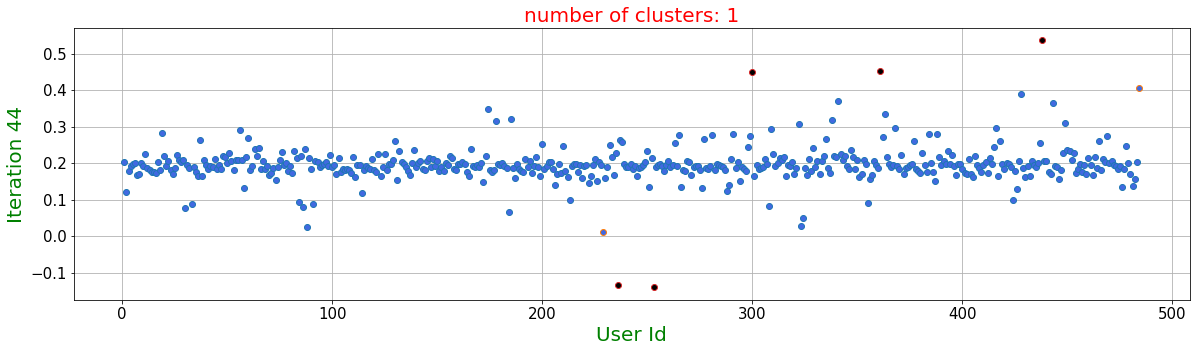

Silhouette Co-efficient:  0.855
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 7.231404958677685 %
----------------------------------------------------------
484
iteration  45
scale of w2:  [ -0.13932676681092399 , 0.5358932219356166 ]


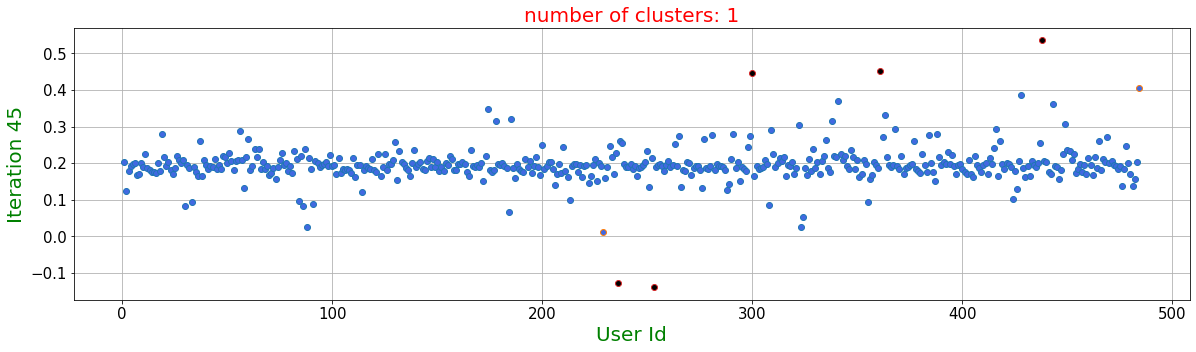

Silhouette Co-efficient:  0.857
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 7.644628099173553 %
----------------------------------------------------------
484
iteration  46
scale of w2:  [ -0.13781119537764325 , 0.5353549758431285 ]


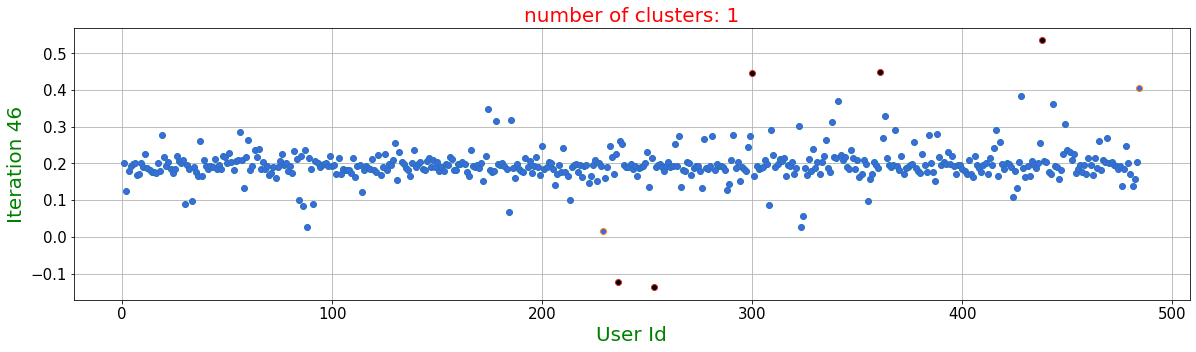

Silhouette Co-efficient:  0.858
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 6.6115702479338845 %
----------------------------------------------------------
484
iteration  47
scale of w2:  [ -0.1363005674528307 , 0.5348166831980475 ]


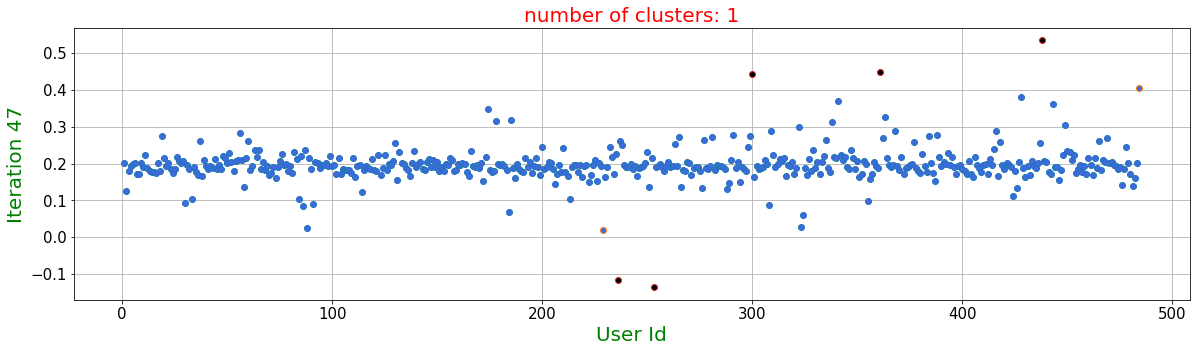

Silhouette Co-efficient:  0.86
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 5.991735537190083 %
----------------------------------------------------------
484
iteration  48
scale of w2:  [ -0.13479488509580617 , 0.5342783464357652 ]


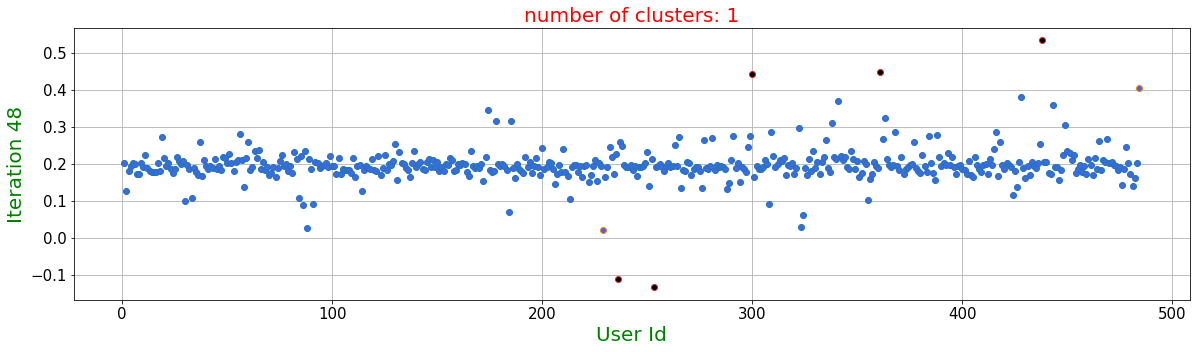

Silhouette Co-efficient:  0.861
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 6.40495867768595 %
----------------------------------------------------------
484
iteration  49
scale of w2:  [ -0.13329415297628858 , 0.5337399698803748 ]


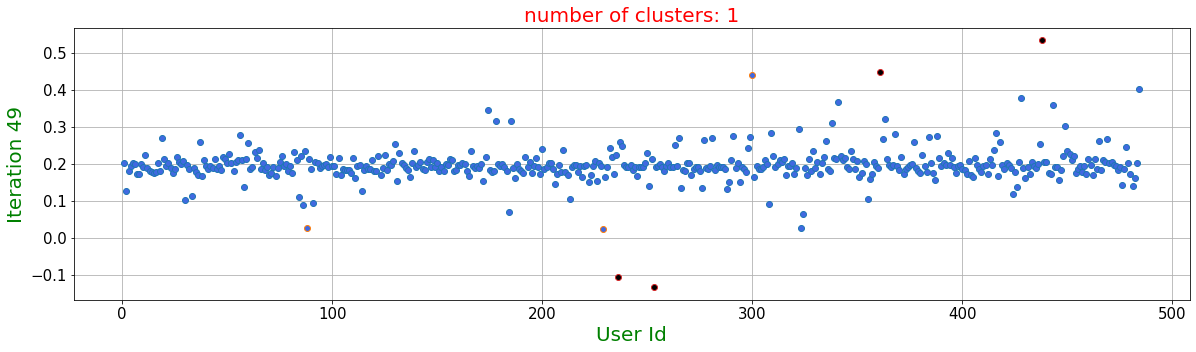

Silhouette Co-efficient:  0.867
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 6.40495867768595 %
----------------------------------------------------------
484
iteration  50
scale of w2:  [ -0.13179837802098285 , 0.5332015595475271 ]


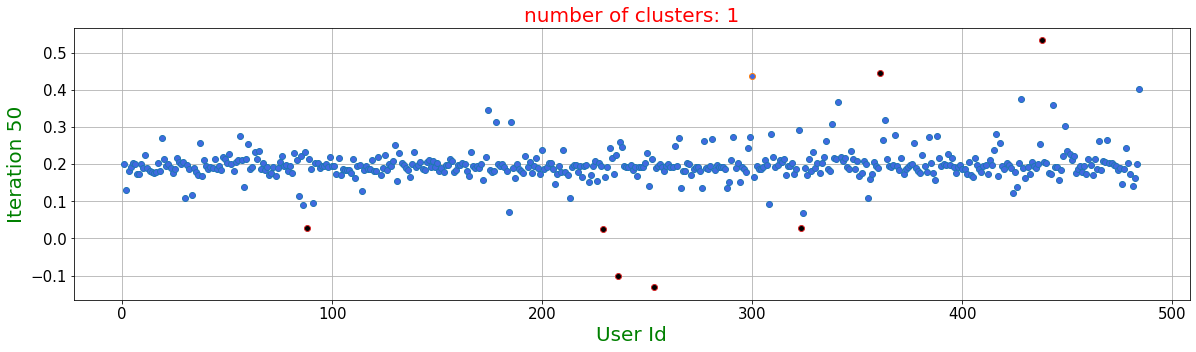

Silhouette Co-efficient:  0.844
No of users changing color :  3
Percentage of users changing color :  0.6198347107438017
----------------------------------------------------------


percentage difference: 5.1652892561983474 %
----------------------------------------------------------
484
iteration  51
scale of w2:  [ -0.13030756909166455 , 0.5326631229629584 ]


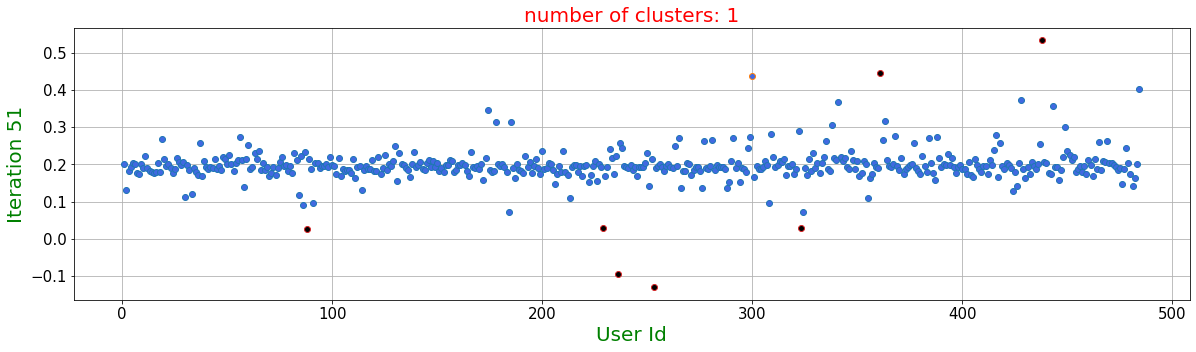

Silhouette Co-efficient:  0.846
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.958677685950414 %
----------------------------------------------------------
484
iteration  52
scale of w2:  [ -0.1288217366922209 , 0.532124668995554 ]


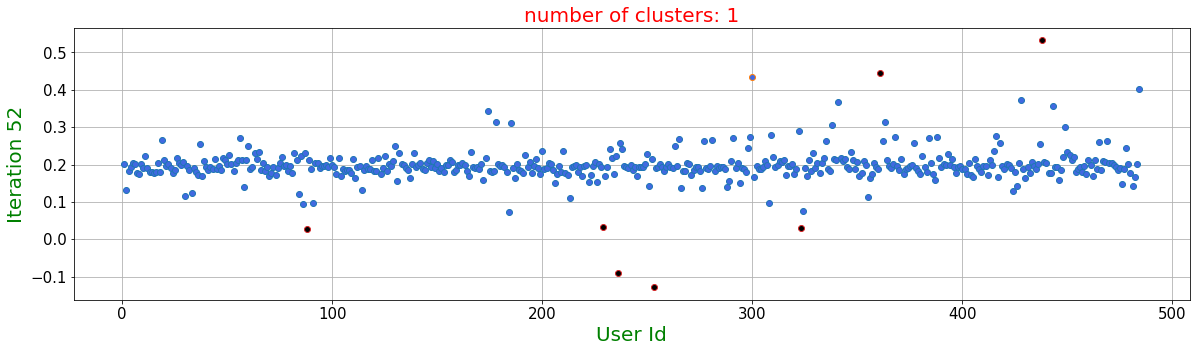

Silhouette Co-efficient:  0.847
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 6.8181818181818175 %
----------------------------------------------------------
484
iteration  53
scale of w2:  [ -0.1273408927023195 , 0.5315862077038959 ]


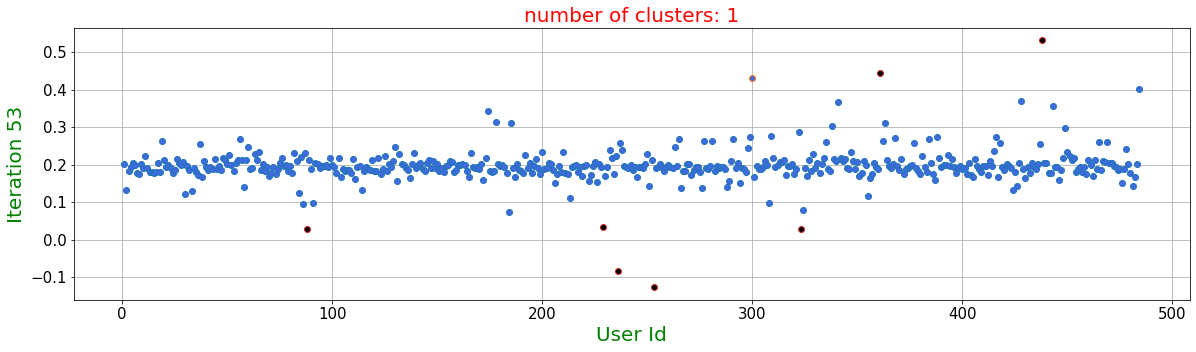

Silhouette Co-efficient:  0.849
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.75206611570248 %
----------------------------------------------------------
484
iteration  54
scale of w2:  [ -0.12586505013556848 , 0.5310477501953077 ]


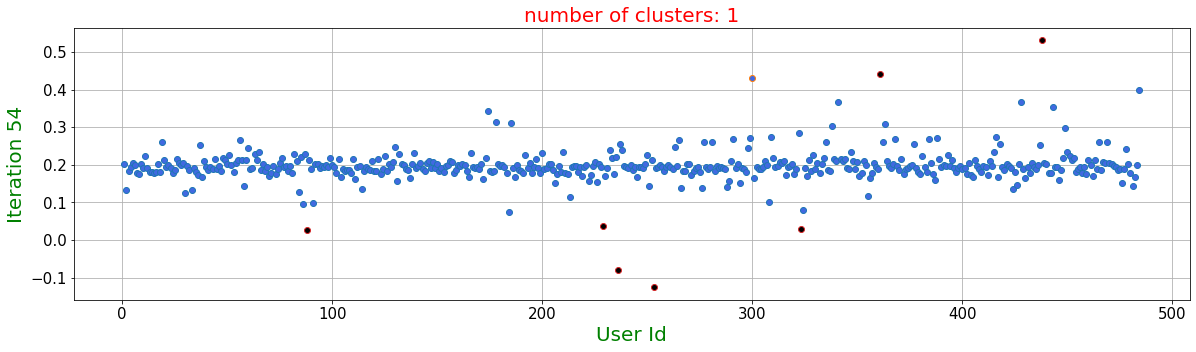

Silhouette Co-efficient:  0.85
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.338842975206612 %
----------------------------------------------------------
484
iteration  55
scale of w2:  [ -0.12439422292020502 , 0.5305093084964857 ]


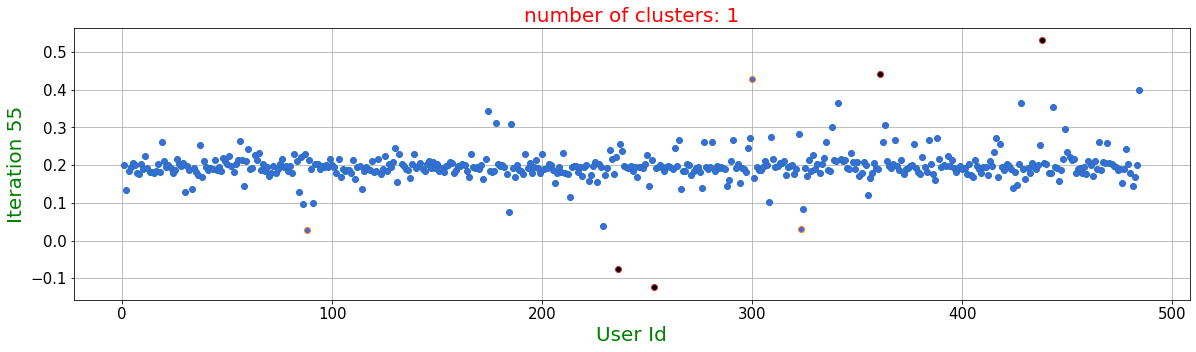

Silhouette Co-efficient:  0.874
No of users changing color :  3
Percentage of users changing color :  0.6198347107438017
----------------------------------------------------------


percentage difference: 4.132231404958678 %
----------------------------------------------------------
484
iteration  56
scale of w2:  [ -0.1229284257005053 , 0.5299708954348609 ]


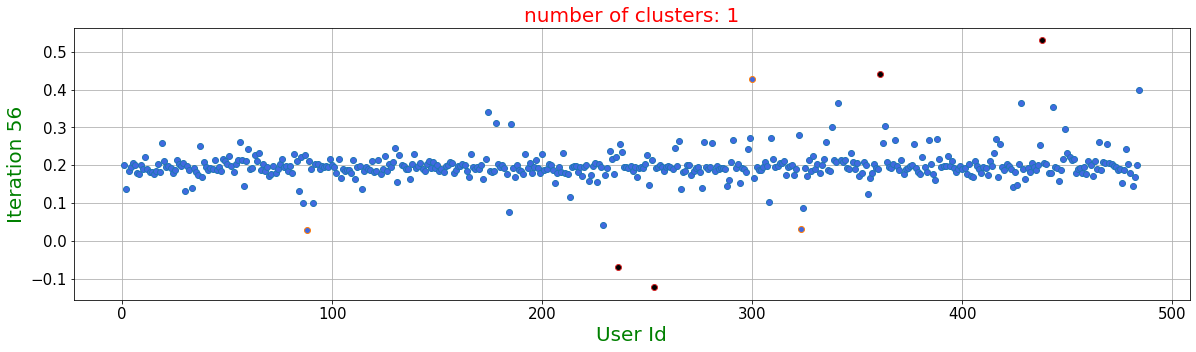

Silhouette Co-efficient:  0.876
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.132231404958678 %
----------------------------------------------------------
484
iteration  57
scale of w2:  [ -0.12146767365725247 , 0.5294325245299009 ]


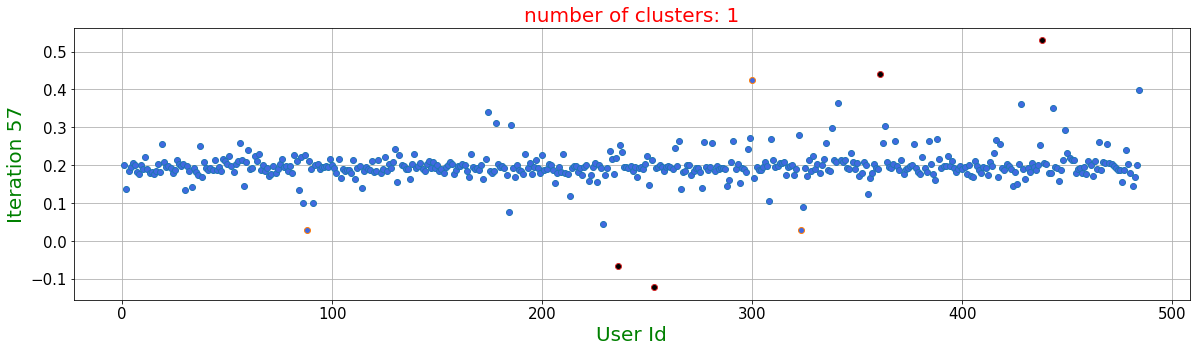

Silhouette Co-efficient:  0.877
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.958677685950414 %
----------------------------------------------------------
484
iteration  58
scale of w2:  [ -0.12001198234572902 , 0.5288942098936122 ]


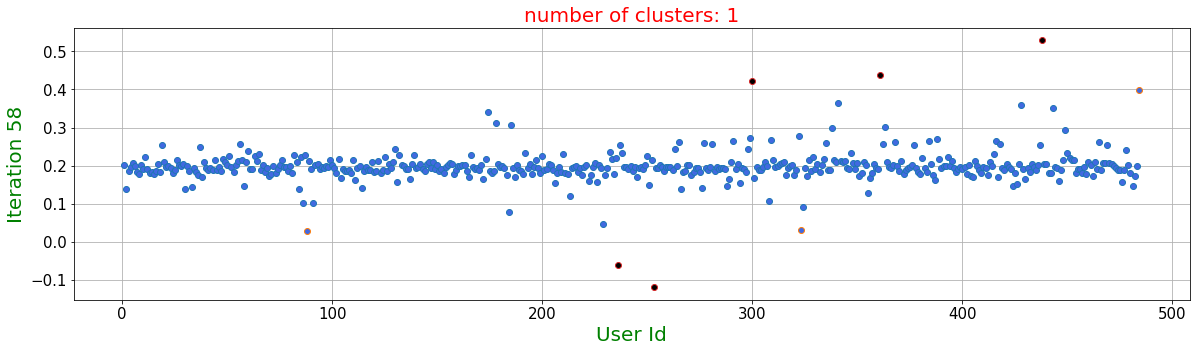

Silhouette Co-efficient:  0.873
No of users changing color :  1
Percentage of users changing color :  0.2066115702479339
----------------------------------------------------------


percentage difference: 4.75206611570248 %
----------------------------------------------------------
484
iteration  59
scale of w2:  [ -0.11856136754981869 , 0.5283559661395564 ]


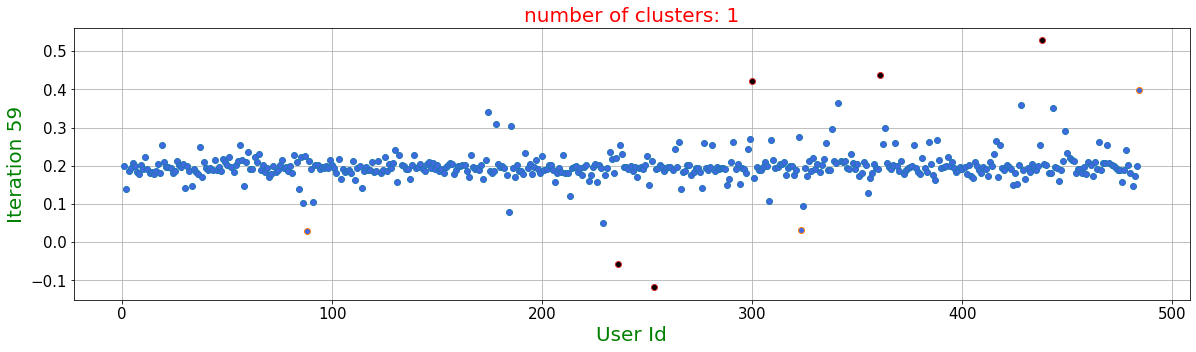

Silhouette Co-efficient:  0.874
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.0991735537190084 %
----------------------------------------------------------
484
iteration  60
scale of w2:  [ -0.11711584515091275 , 0.5278178082997387 ]


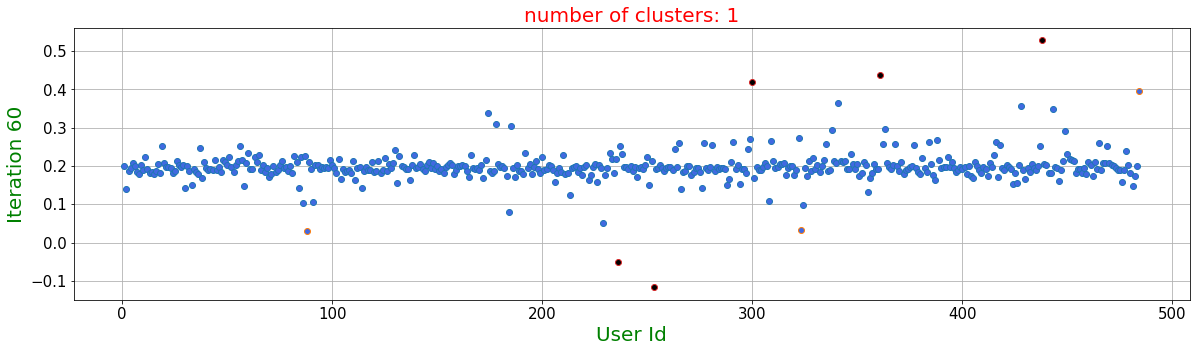

Silhouette Co-efficient:  0.875
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.925619834710744 %
----------------------------------------------------------
484
iteration  61
scale of w2:  [ -0.11567543101041508 , 0.5272797517487775 ]


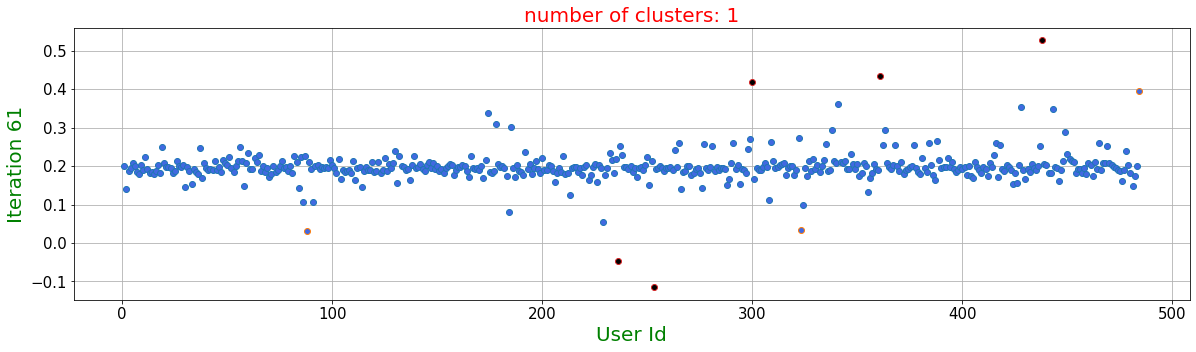

Silhouette Co-efficient:  0.876
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.3057851239669422 %
----------------------------------------------------------
484
iteration  62
scale of w2:  [ -0.11424014086473318 , 0.5267418121347984 ]


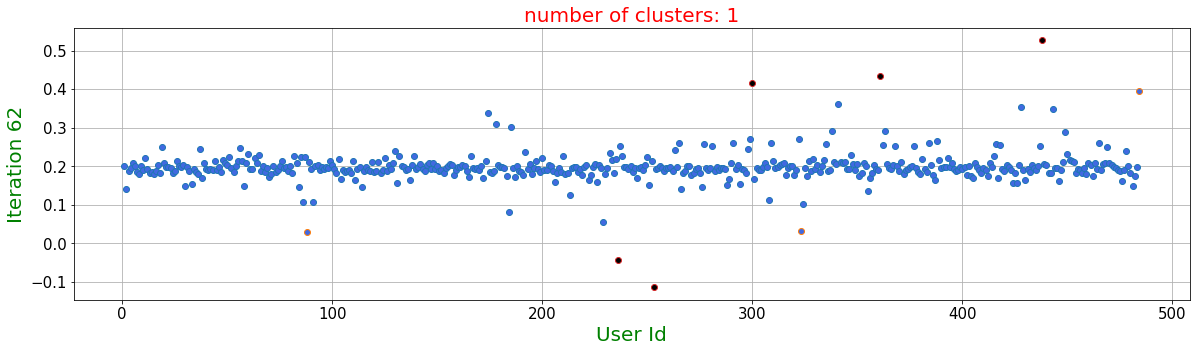

Silhouette Co-efficient:  0.877
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.338842975206612 %
----------------------------------------------------------
484
iteration  63
scale of w2:  [ -0.11280999023172704 , 0.5262040053165414 ]


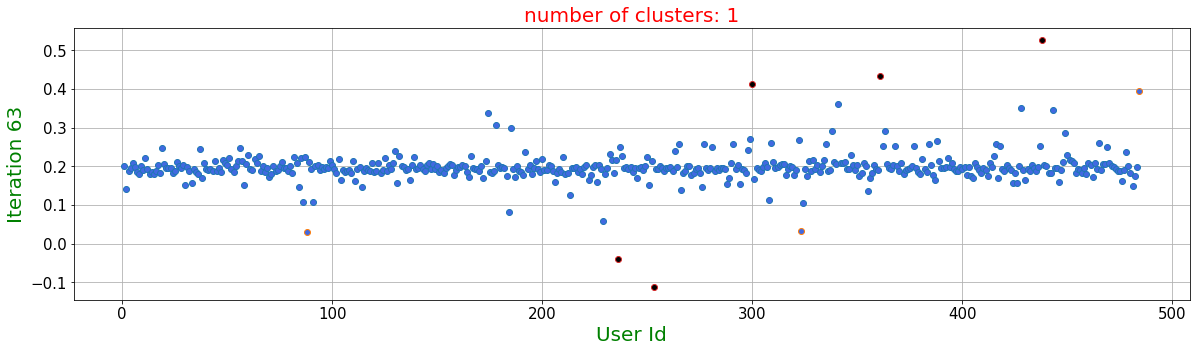

Silhouette Co-efficient:  0.878
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.71900826446281 %
----------------------------------------------------------
484
iteration  64
scale of w2:  [ -0.11138499432766621 , 0.5256663473062022 ]


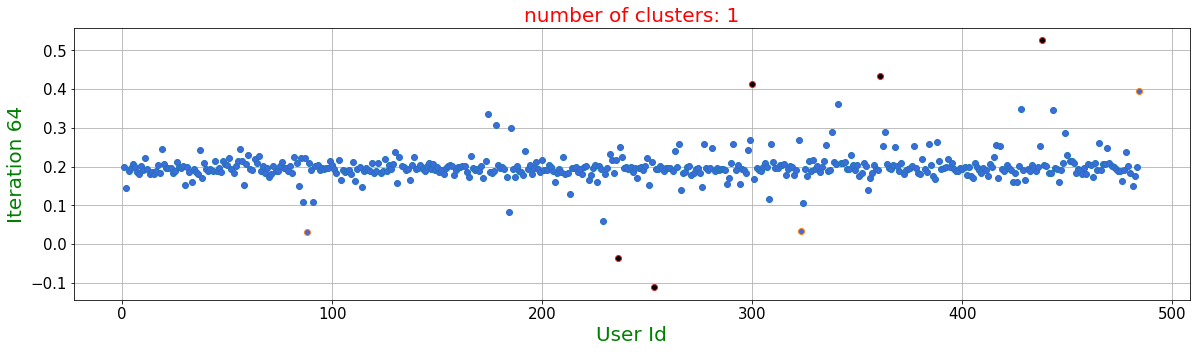

Silhouette Co-efficient:  0.879
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 2.8925619834710745 %
----------------------------------------------------------
484
iteration  65
scale of w2:  [ -0.10996516799381782 , 0.5251288542175648 ]


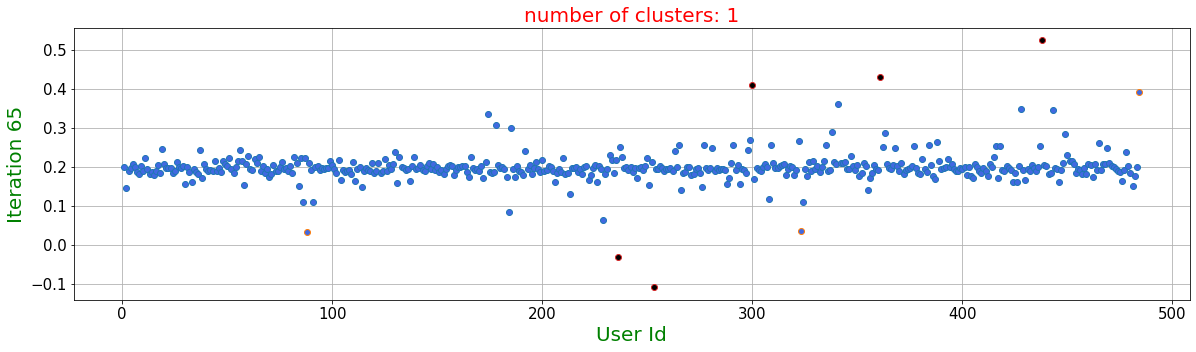

Silhouette Co-efficient:  0.88
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 2.8925619834710745 %
----------------------------------------------------------
484
iteration  66
scale of w2:  [ -0.10855052563185531 , 0.5245915422190144 ]


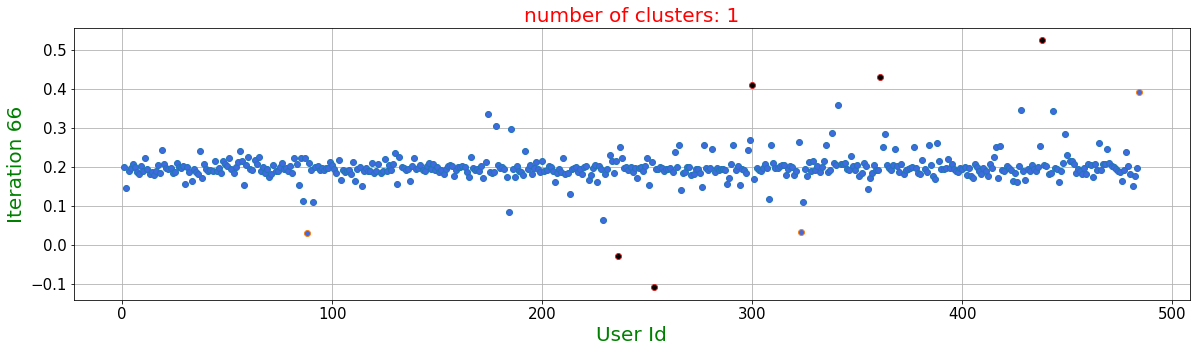

Silhouette Co-efficient:  0.881
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.3057851239669422 %
----------------------------------------------------------
484
iteration  67
scale of w2:  [ -0.1071410811473395 , 0.5240544274910476 ]


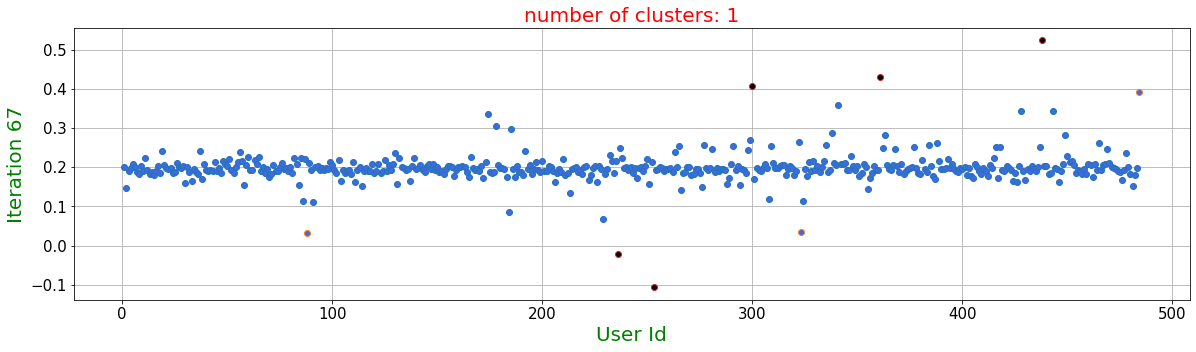

Silhouette Co-efficient:  0.881
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 2.8925619834710745 %
----------------------------------------------------------
484
iteration  68
scale of w2:  [ -0.1057368479005807 , 0.5235175261879269 ]


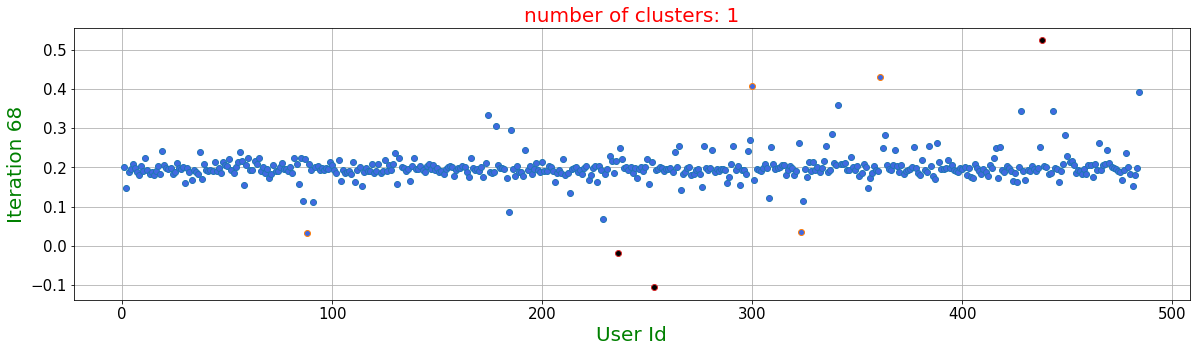

Silhouette Co-efficient:  0.892
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------


percentage difference: 4.958677685950414 %
----------------------------------------------------------
484
iteration  69
scale of w2:  [ -0.10433783866424397 , 0.5229808544031506 ]


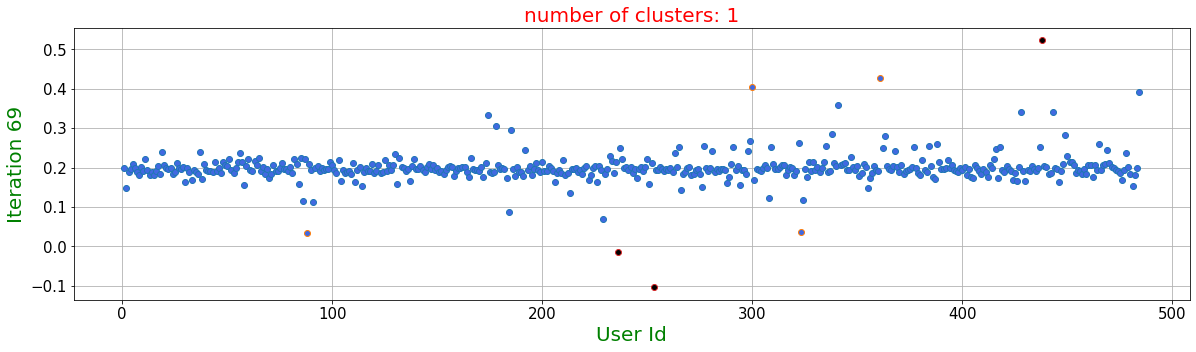

Silhouette Co-efficient:  0.892
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.3057851239669422 %
----------------------------------------------------------
484
iteration  70
scale of w2:  [ -0.10294406558710827 , 0.5224444281384338 ]


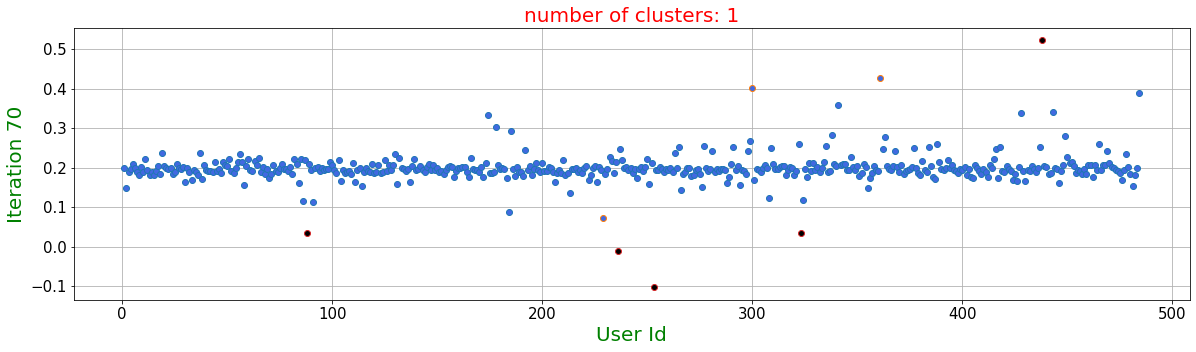

Silhouette Co-efficient:  0.878
No of users changing color :  2
Percentage of users changing color :  0.4132231404958678
----------------------------------------------------------


percentage difference: 2.479338842975207 %
----------------------------------------------------------
484
iteration  71
scale of w2:  [ -0.10155554016343593 , 0.52190826327592 ]


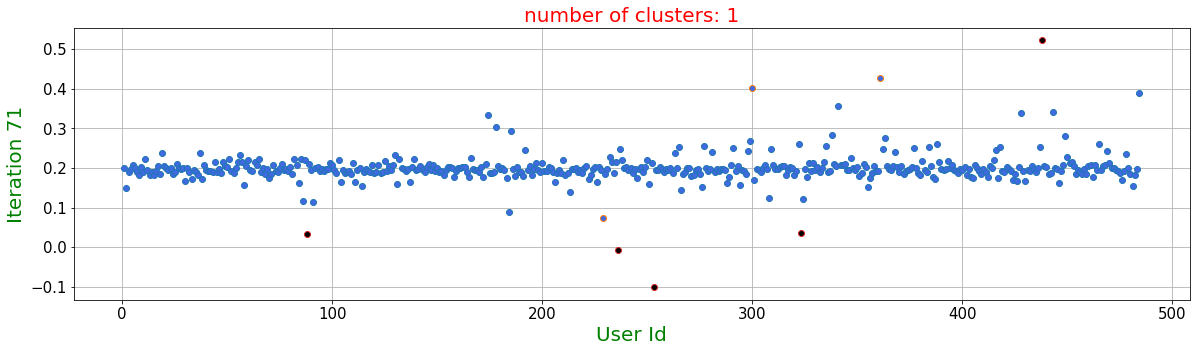

Silhouette Co-efficient:  0.879
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.0991735537190084 %
----------------------------------------------------------
484
iteration  72
scale of w2:  [ -0.10017227320745094 , 0.5213723755533602 ]


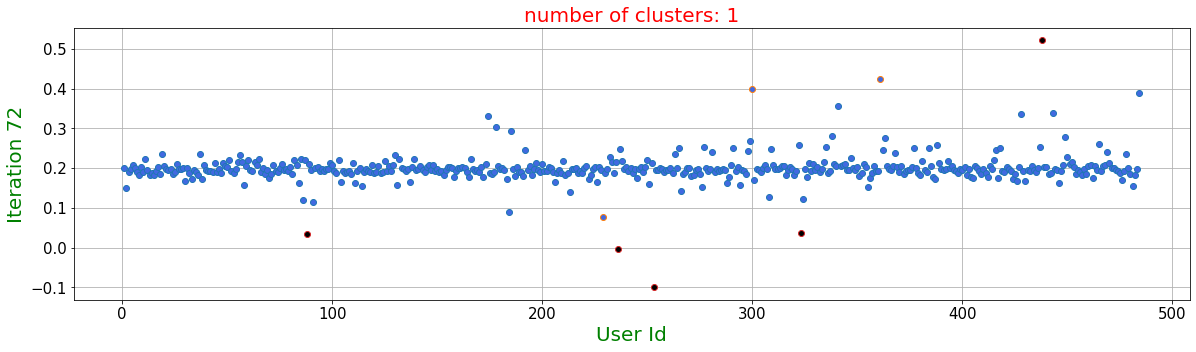

Silhouette Co-efficient:  0.88
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.71900826446281 %
----------------------------------------------------------
484
iteration  73
scale of w2:  [ -0.09879427483246328 , 0.5208367805420211 ]


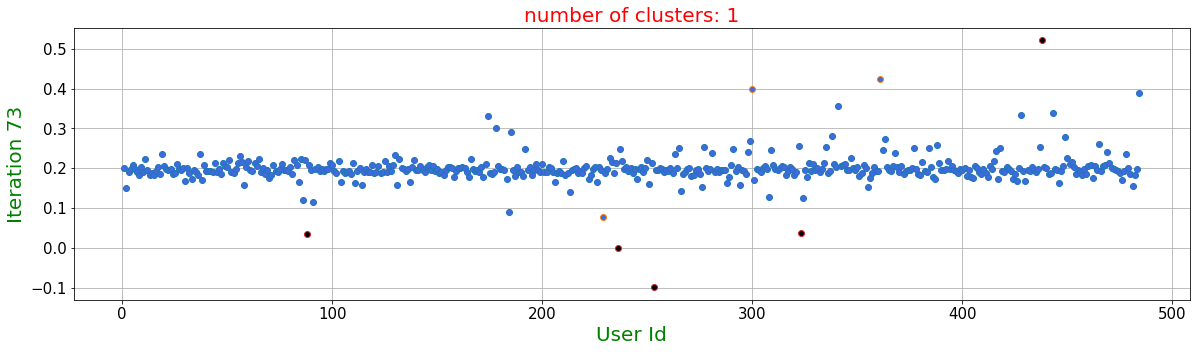

Silhouette Co-efficient:  0.881
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 2.479338842975207 %
----------------------------------------------------------
484
iteration  74
scale of w2:  [ -0.09742155443421303 , 0.5203014936270955 ]


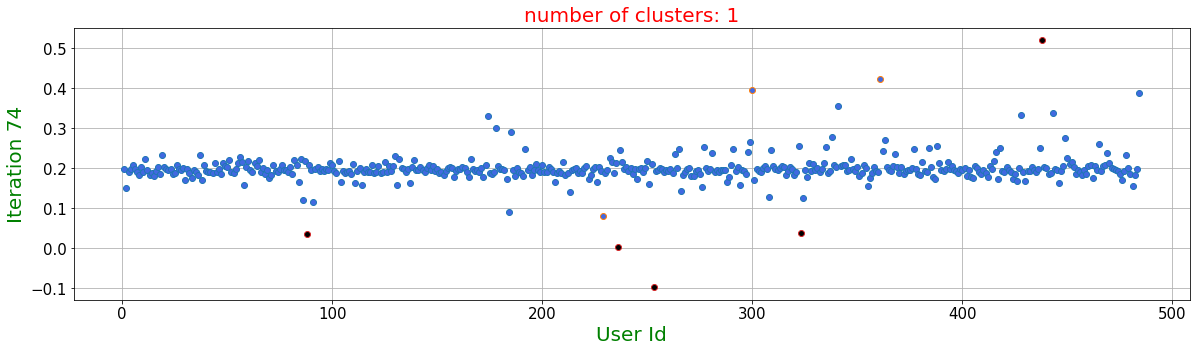

Silhouette Co-efficient:  0.882
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.71900826446281 %
----------------------------------------------------------
484
iteration  75
scale of w2:  [ -0.09605412067804088 , 0.5197665299904122 ]


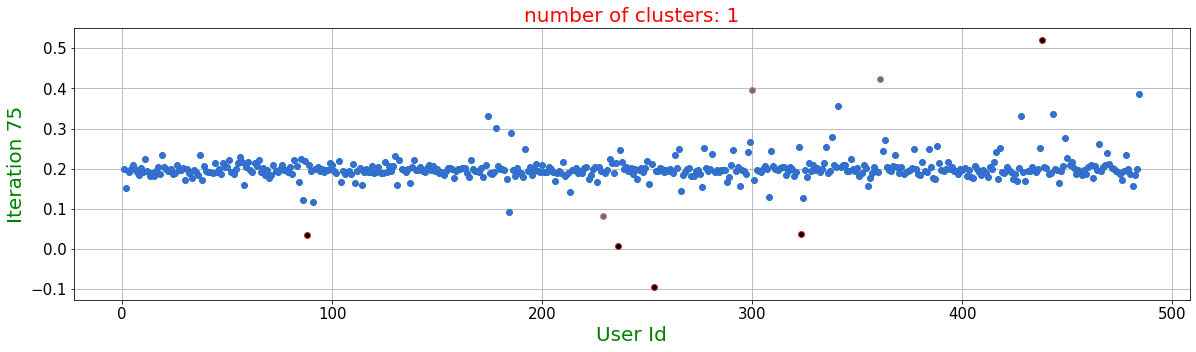

Silhouette Co-efficient:  0.883
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 2.6859504132231407 %
----------------------------------------------------------
484
iteration  76
scale of w2:  [ -0.09469198148952296 , 0.5192319045952509 ]


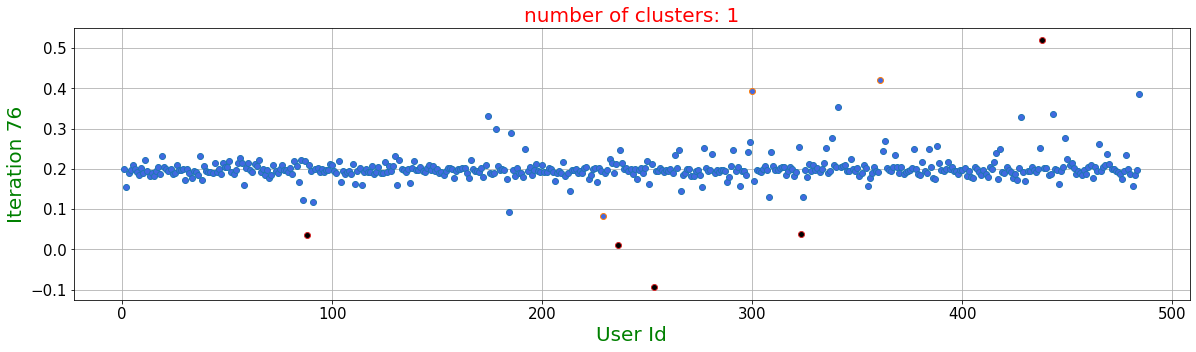

Silhouette Co-efficient:  0.884
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.512396694214876 %
----------------------------------------------------------
484
iteration  77
scale of w2:  [ -0.09333514404823648 , 0.518697632173089 ]


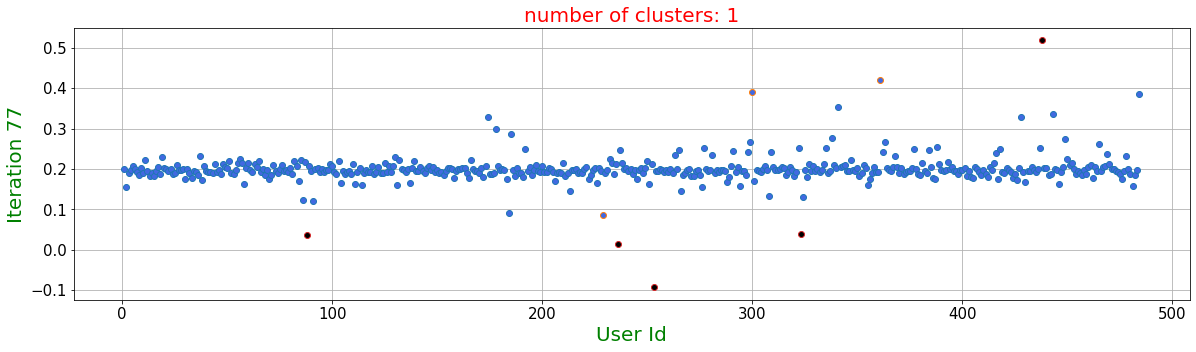

Silhouette Co-efficient:  0.885
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.3057851239669422 %
----------------------------------------------------------
484
iteration  78
scale of w2:  [ -0.09198361478434905 , 0.5181637272121138 ]


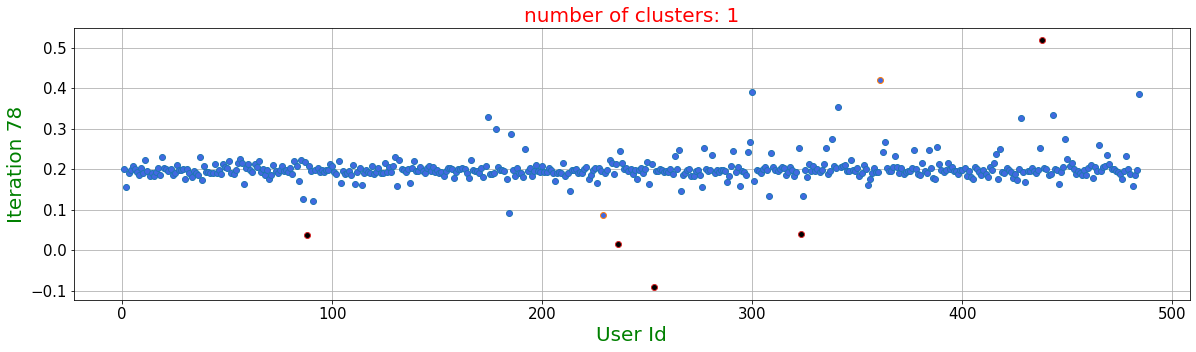

Silhouette Co-efficient:  0.885
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 4.132231404958678 %
----------------------------------------------------------
484
iteration  79
scale of w2:  [ -0.09063739937774912 , 0.5176302039473532 ]


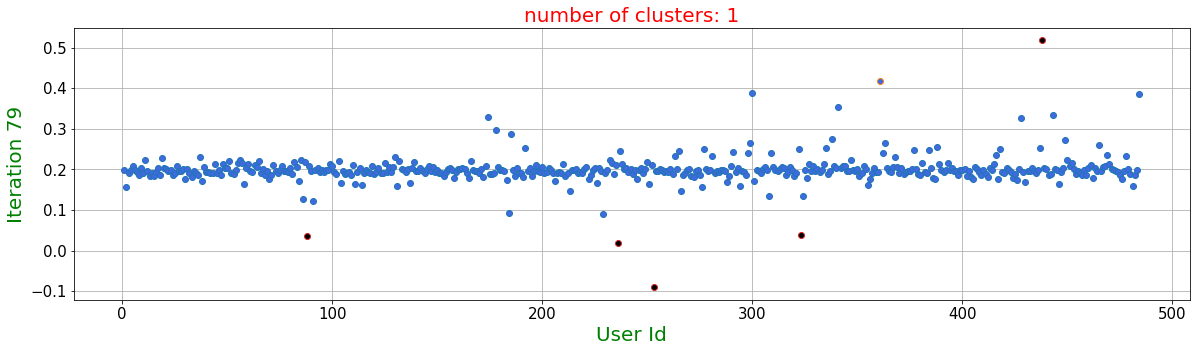

Silhouette Co-efficient:  0.886
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 1.859504132231405 %
----------------------------------------------------------
484
iteration  80
scale of w2:  [ -0.08929650275945787 , 0.5170970763522831 ]


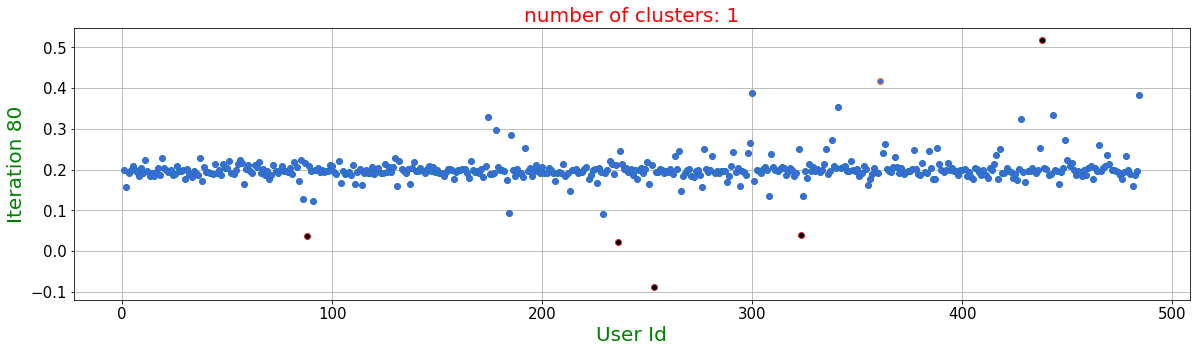

Silhouette Co-efficient:  0.887
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 1.859504132231405 %
----------------------------------------------------------
484
iteration  81
scale of w2:  [ -0.08796092911508359 , 0.5165643581317849 ]


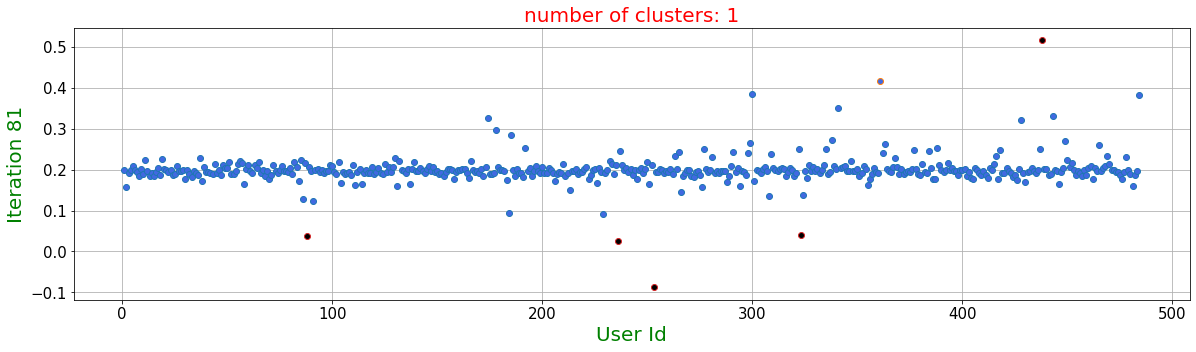

Silhouette Co-efficient:  0.888
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 2.479338842975207 %
----------------------------------------------------------
484
iteration  82
scale of w2:  [ -0.08663068189009922 , 0.5160320627163345 ]


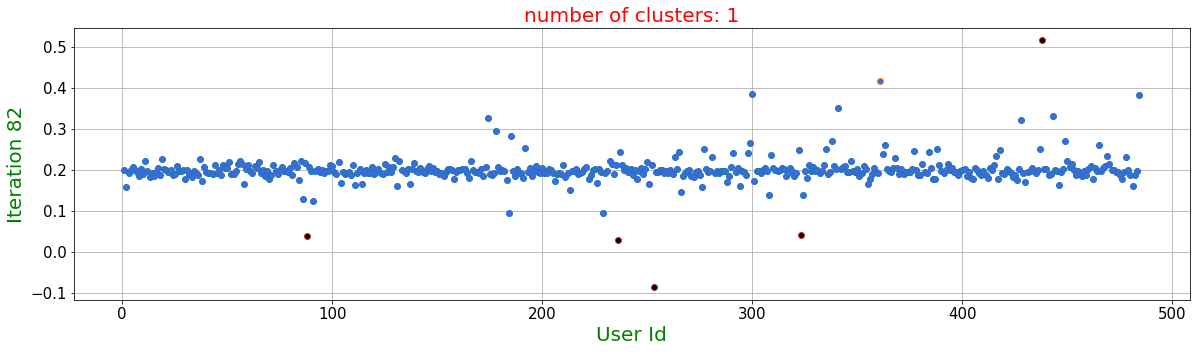

Silhouette Co-efficient:  0.889
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 1.859504132231405 %
----------------------------------------------------------
484
iteration  83
scale of w2:  [ -0.08530576379674161 , 0.5155002032573129 ]


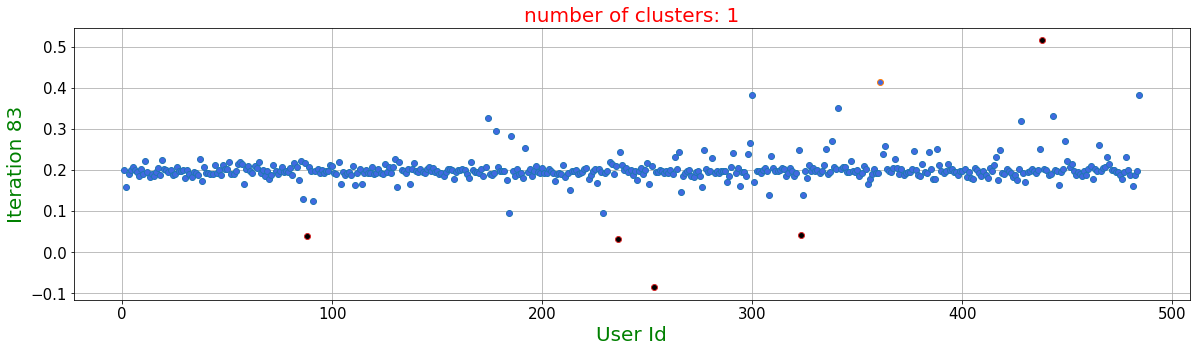

Silhouette Co-efficient:  0.889
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 1.6528925619834711 %
----------------------------------------------------------
484
iteration  84
scale of w2:  [ -0.08398617682234774 , 0.5149687926233396 ]


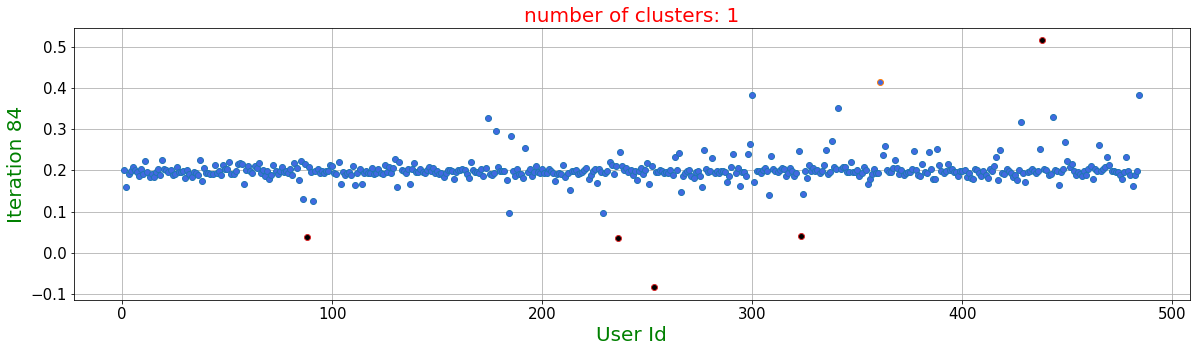

Silhouette Co-efficient:  0.89
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 3.0991735537190084 %
----------------------------------------------------------
484
iteration  85
scale of w2:  [ -0.08267192223895838 , 0.5144378433975337 ]


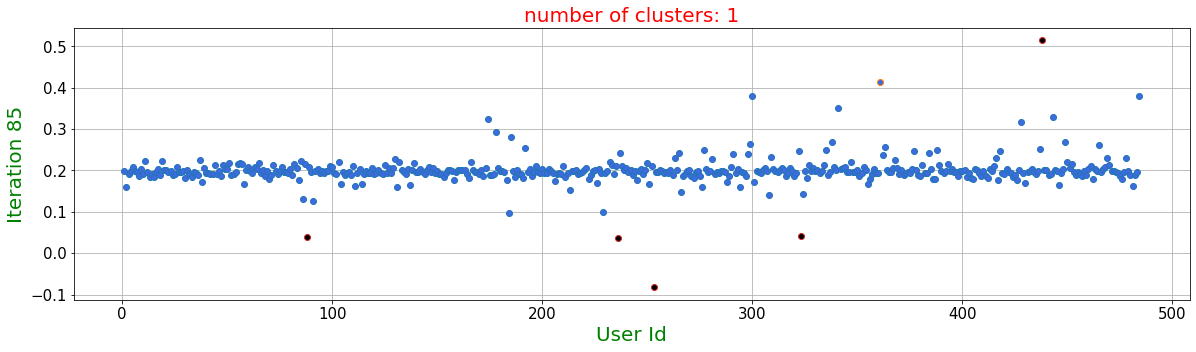

Silhouette Co-efficient:  0.891
No of users changing color :  0
Percentage of users changing color :  0.0
----------------------------------------------------------


percentage difference: 0.8264462809917356 %
----------------------------------------------------------


In [ ]:
 
x=0
old_color=None
new_color=None
colorOur=[]
ss=[]
while(1):
   
    colmap = {1: 'r', 2: 'g', 3: 'b'}
    w2=[]
    for i in range (0,484):
        
        I=opinion[i];
        l=str(my_data['following'][i])
        l=l[1:-1]
        l=l.split(',')
        sumCp=0
        followerOpinion=0
        for j in range(len(l)):
          ind=int(l[j])
          cp=convin[ind]
          sumCp=sumCp+1
          followerOpinion=followerOpinion+(opinion[ind]- I )*cp
 
        followerOpinion=followerOpinion/sumCp
        b=bias[i]
        followerOpinion = followerOpinion * b 
        w2.append(followerOpinion)  
          
    lenw2=len(w2)
    for i in range (len(w2)):
      w2[i]=(w2[i]+opinion[i]) 

    #----------------------------------------------------------------------------------
  
    print("iteration ",x)
    
    print("scale of w2: ","[" ,min(w2), "," , max(w2), "]")
    mn=[]
    for p in range(0,484):
        mn.append({'x':w2[p]})
    X = pd.DataFrame(mn,columns=['x'])
        # X.head()
    # dbscan(cluster,0.0375,4)
    
    db_default = DBSCAN(eps = 0.0375, min_samples = 4).fit(X) 
    # print(type(db_default))
    labels = db_default.labels_ 
    new_color=labels[:]
    core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool) 
    core_samples_mask[db_default.core_sample_indices_] = True
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
   
    unique_labels = set(labels) 
    # print('labels ',labels)
    # print('new_color ',new_color)
    # print('unique_labels ',unique_labels)
    colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
   

    plt.figure(figsize =(20, 5)) 
    plt.rc('xtick',labelsize=15,color='black')
    plt.rc('ytick',labelsize=15,color='black')
    
    # plt.xlim(-1.2, 1.2)
    # plt.ylim(-1.2, 1.2)
    plt.xlabel('User Id',fontsize=20,color='green')
    ystring='Iteration '+str(x)
    plt.ylabel(ystring,fontsize=20,color='green')
    plt.grid(True)
    for k, col in zip(unique_labels, colors): 
          if k == -1: 
              # Black used for noise. 
              col = [0, 0, 0, 1]

          
          class_member_mask = (labels == k) 
          
          idarr=[]
          xy = X[class_member_mask & core_samples_mask] 
          for l in range(len(class_member_mask)):
            if(class_member_mask[l]== True and core_samples_mask[l]==True ):
              idarr.append(l+1)
         
          plt.plot(idarr,xy.iloc[:, 0],  'o', markerfacecolor=col,markersize=6) 
        
          
          idarr=[]
          xy = X[class_member_mask & ~core_samples_mask]          
          for l in range(len(class_member_mask)):
            if(class_member_mask[l]== True and core_samples_mask[l]==False ):
              idarr.append(l+1)
          plt.plot(idarr,xy.iloc[:, 0], 'o', markerfacecolor=col,markersize=6)
    
    plt.title('number of clusters: %d' %n_clusters_,fontsize=20,color='red') 
    plt.show() 
    strfss="{0:.3f}"
    fss= metrics.silhouette_score(X,labels)
    strss=strfss.format(fss)
    ss.append(float(strss))
   
    print('Silhouette Co-efficient: ',float(strss))
    change=0 
    if x!=0:
        for p in range(0,484):
            if old_color[p]!=new_color[p] :
                change = change+1
#                print("index of person who changed opinion ",p)
    print("No of users changing color : ",change)
    change = (change/484)*100
    print("Percentage of users changing color : ",change)
    print("----------------------------------------------------------")
    colorOur.append(change)
    old_color=new_color[:]
    #----------------------------------------------------------------------------------
    strf="{0:.2f}"
    cnt=0;
    for i in range(lenw2):      
      if( (strf.format(w2[i]))  !=  (strf.format(opinion[i]))   ):
        cnt=cnt+1

    cnt=(cnt/lenw2)*100
    print('\n')
    print("percentage difference:",cnt,"%")
    print("----------------------------------------------------------")
   
    x=x+1
    if(cnt<1):
      break

    for i in range(len(w2)):
      opinion[i]=w2[i]
    print(len(opinion))

In [ ]:
 mn=[]
for p in range(0,484):
        mn.append({'x': w2[p], 'y': bias[p]})
X = pd.DataFrame(mn,columns=['x','y'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 8

In [ ]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [ ]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("Opinion Value")
    plt.ylabel("Biasness ")

#BAYESIAN INFORMATION CRITERION(BIC)
LOWER THE BIC ,BETTER IS THE MODEL TO PREDICT THE DATA
#GRADIENT OF BIC SCORE 
see if slope is almost constant after a point

In [ ]:
 mn=[]
for p in range(0,484):
        mn.append({'x': w2[p], 'y': bias[p]})
X = pd.DataFrame(mn,columns=['x','y'])

In [ ]:
n_clusters=np.arange(2, 20)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(X) 
        
        tmp_bic.append(gmm.bic(X))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

#suggesting 6 ,but 5 is equally good

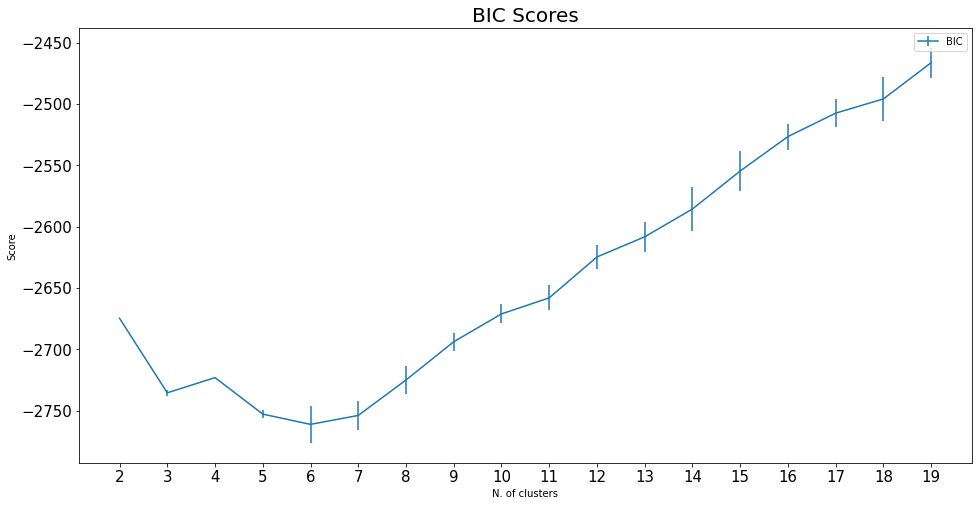

In [ ]:

plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

#check whether BIC change slope is big
#negative slope indicates value next is small 
#positive slope indicated value next is large
#suggesting 5 ,since gradient increases after that  

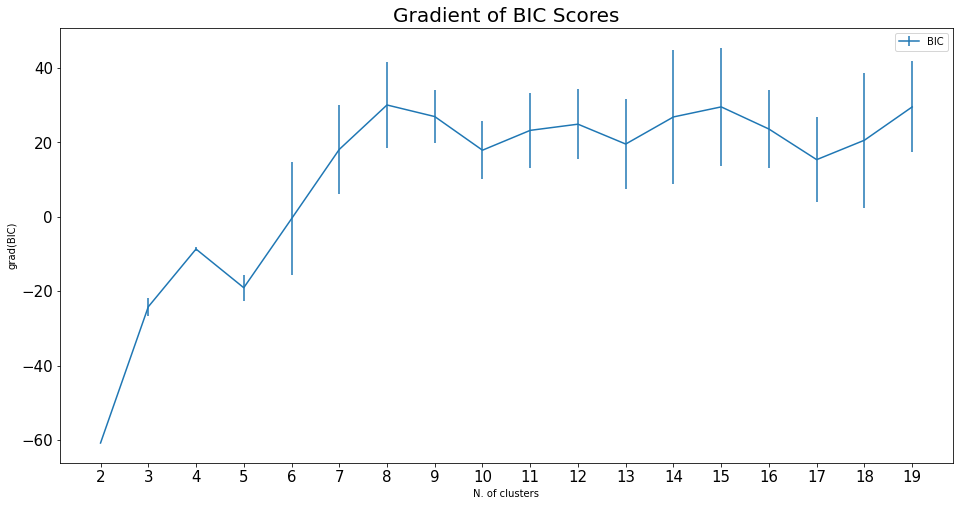

In [ ]:

plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()


#SILHOUETTE SCORE 
THE LARGER THE BETTER

In [ ]:
 mn=[]
for p in range(0,484):
        mn.append({'x': w2[p], 'y': bias[p]})
X = pd.DataFrame(mn,columns=['x','y'])

In [ ]:
n_clusters=np.arange(2, 20)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(X) 
        labels=gmm.predict(X)
        sil=metrics.silhouette_score(X, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

#3 equally good as 5

Text(0, 0.5, 'Score')

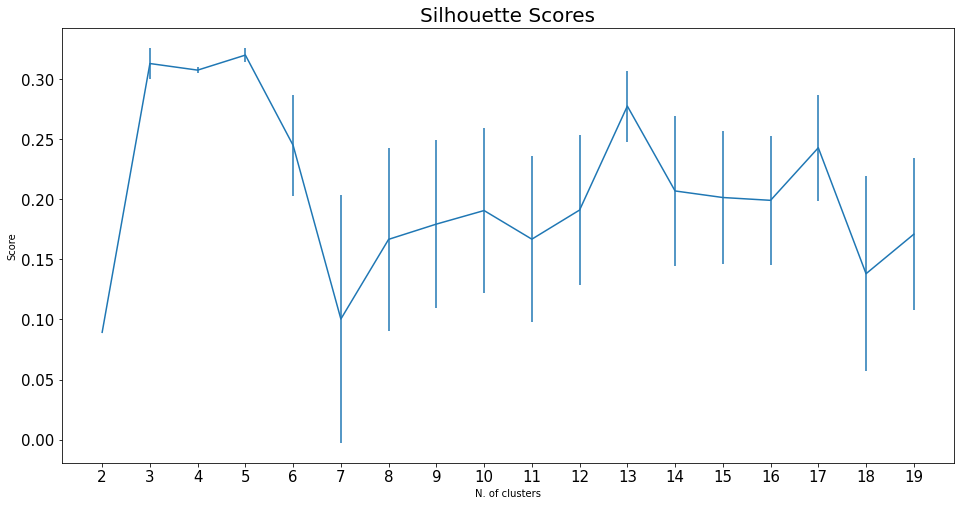

In [ ]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

#DISTANCE BETWEEN GMMS

Check how much the GMMs trained on the two sets are similar

The lesser is the  Jensen-Shannon(JS)-distance between the two GMMs, the more the GMMs agree on how to fit the data.

In [ ]:
 mn=[]
for p in range(0,484):
        mn.append({'x': w2[p], 'y': bias[p]})
X = pd.DataFrame(mn,columns=['x','y'])

In [ ]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [ ]:
n_clusters=np.arange(2, 20)
iterations=20
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        
        gmm_train=GMM(n, n_init=2).fit(train) 
        gmm_test=GMM(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)


#We can say that the good configuration, which takes in account both of the amount of information included (=biggest possible number of clusters) and on the stability of the fitting procedure (=lowest possible GMMs distance), is the one which considers 3 or 5 cluster.

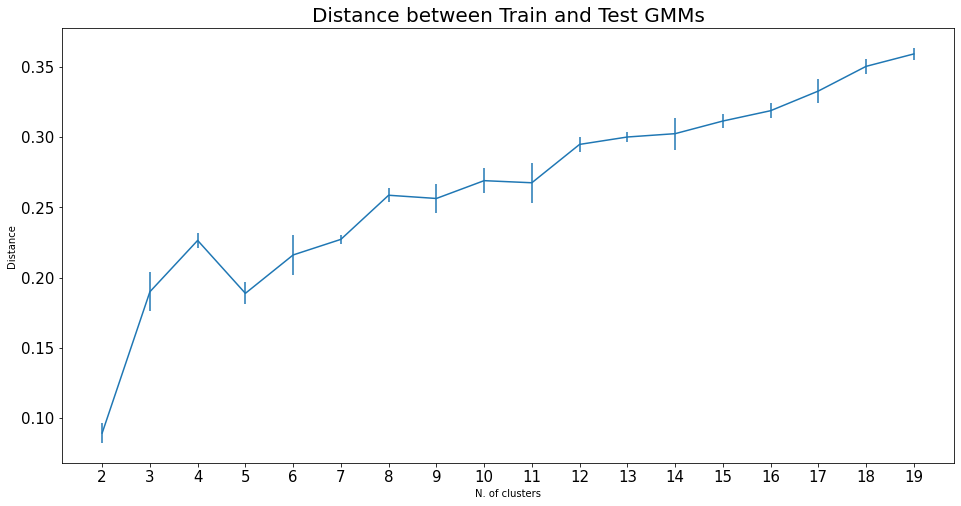

In [ ]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

#BIC 5 AND 6 ARE EQUALLY GOOD
#SILHOUETTE 3 AND 5 ARE EQUALLY GOOD
#DISTANCE BETWEEN GMMS 3 AND 5 EQUALLY GOOD

In [ ]:
import pandas as pd
obj={'Metric': ['Silohuette score', 'Distance between Train and Test GMMs', 'Gradient of BIC scores'],
    "number of clusters": [5,5,5]}
df=pd.DataFrame(obj)
df.set_index('Metric')

,number of clusters
Metric,
Silohuette score,5
Distance between Train and Test GMMs,5
Gradient of BIC scores,5


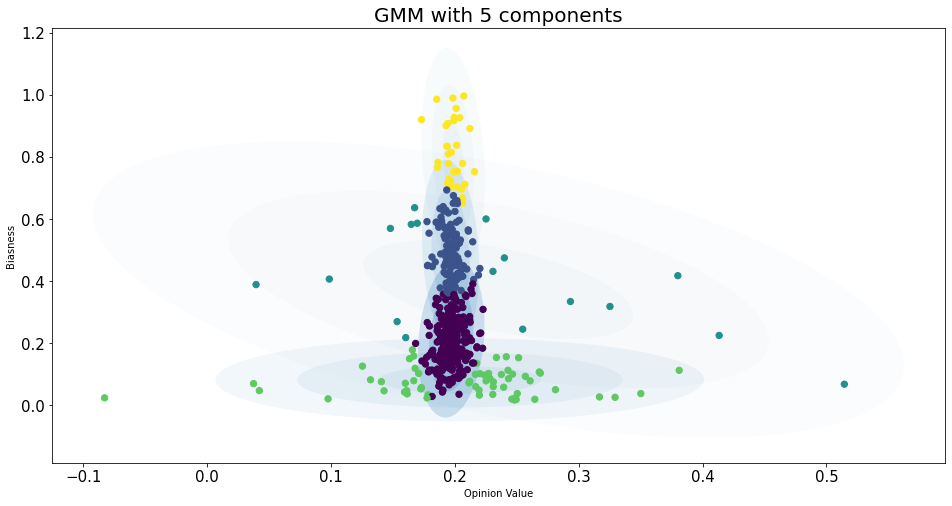

In [ ]:
gmm=GMM(5).fit(X) 
plot_gmm(gmm, X)

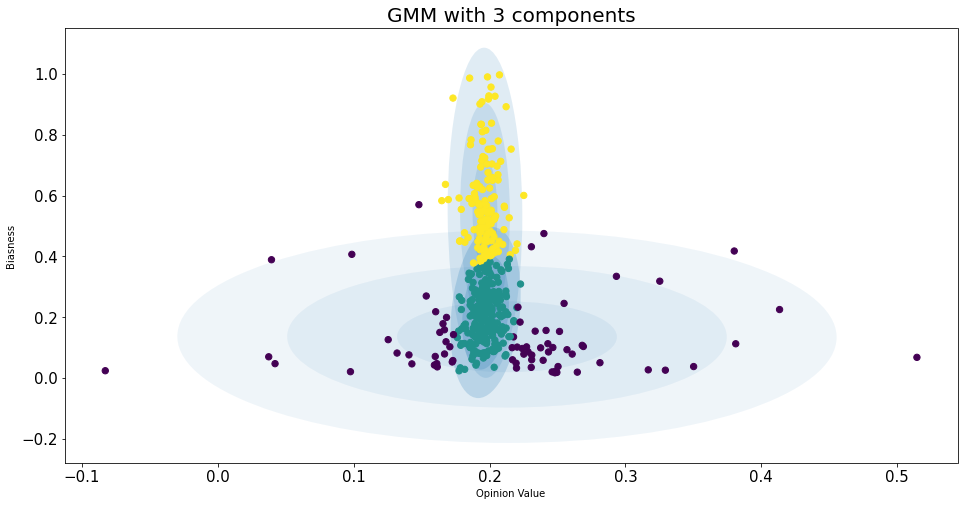

In [ ]:
gmm=GMM(3).fit(X) 
plot_gmm(gmm, X)

In [ ]:
 mn=[]
for p in range(0,484):
        mn.append({'x': w2[p],'y': w2[p]})
X_new = pd.DataFrame(mn,columns=['x','y'])

In [ ]:
idarr=[]
for i in range (0,484):
  idarr.append(i+1)

In [ ]:
def plot_gmm_new(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X.iloc[:, 0],idarr, c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X.iloc[:, 0], idarr, s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("Opinion Value")
    plt.ylabel("User Id ")

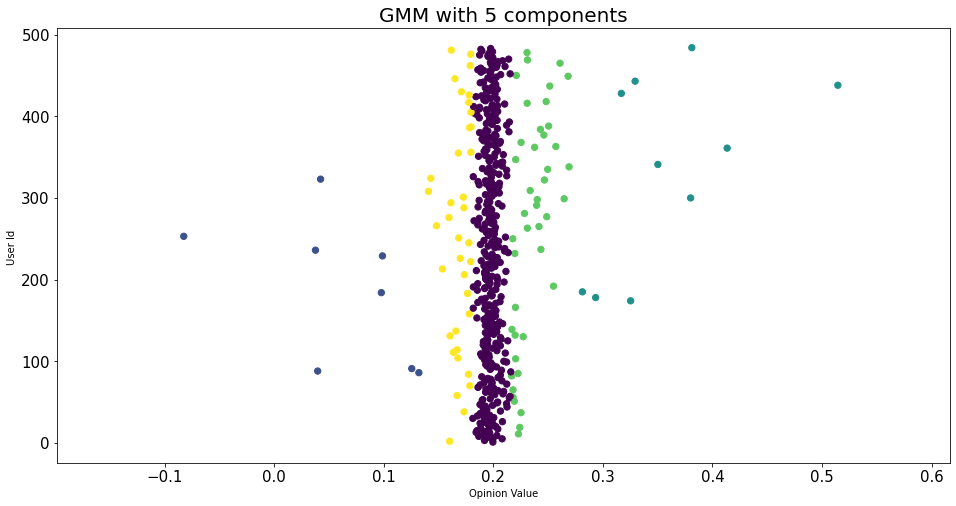

In [ ]:
gmm=GMM(5).fit(X_new) 
plot_gmm_new(gmm, X_new)

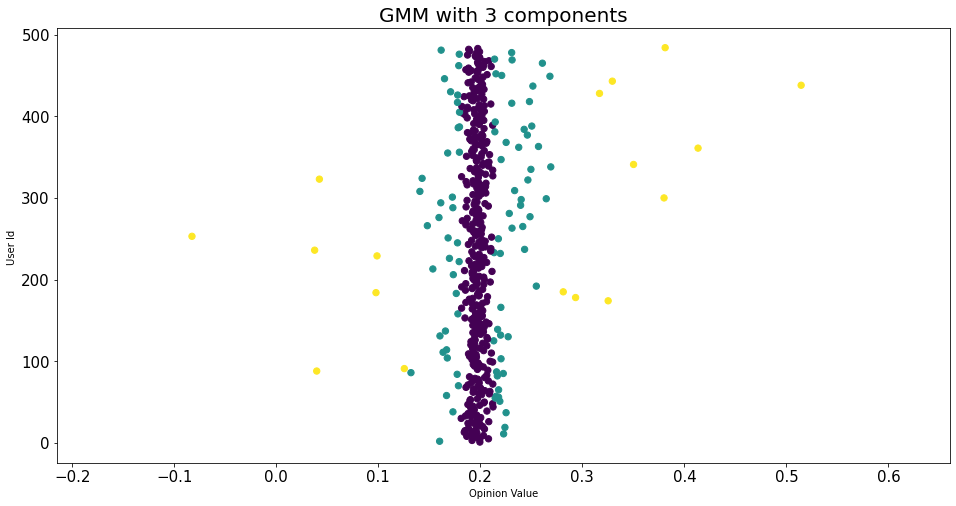

In [ ]:
gmm=GMM(3).fit(X_new) 
plot_gmm_new(gmm, X_new)